In [1]:
import json
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from src.inout.load_omop import OMOP_data


In [2]:
csv_folder_path = './data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv'

with open('./data/OMOP_structure_and_types/OMOPCDM_5.3_structure.json', 'r') as f:
    tables_structure = json.load(f)
    
omop_db = OMOP_data(csv_data_path=csv_folder_path, tables_structure=tables_structure)

Ingesting clinical_tables:
Ingesting table person.
Ingesting file ./data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv/person.csv was successful.
Ingesting table observation_period.
Ingesting file ./data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv/observation_period.csv was successful.
Ingesting table death.
Ingesting file ./data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv/death.csv was successful.
Ingesting table visit_occurrence.
Ingesting file ./data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv/visit_occurrence.csv was successful.
Ingesting table visit_detail.
Ingesting file ./data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv/visit_detail.csv was successful.
Ingesting table condition_occurrence.
Ingesting file ./data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv/condition_occurrence.csv was successful.
Ingesting table drug_exposure.
Ingestin

In [3]:
from icdmappings import Mapper, Validator

mapper = Mapper()
validator = Validator()

In [4]:
list(validator.validate(list(map(str.strip, omop_db.clinical_tables.condition_occurrence['condition_source_value'].tolist())),
                           expects='icd10_diagnostic')).count(True)

1890

In [5]:
len(list(map(str.strip, omop_db.clinical_tables.condition_occurrence['condition_source_value'].tolist())))

16441

In [6]:
omop_db.clinical_tables.condition_occurrence['ccsr_code'] = omop_db.clinical_tables.condition_occurrence['condition_source_value'].apply(lambda x: mapper.map(x.strip(), 
                                                                                                                                                              source='icd10', 
                                                                                                                                                              target='ccsr'))

In [7]:
omop_db.clinical_tables.condition_occurrence['icd10_chapters'] = omop_db.clinical_tables.condition_occurrence['condition_source_value'].apply(lambda x: mapper.map(x.strip(), 
                                                                                                                                                                   source='icd10', 
                                                                                                                                                                   target='chapter'))

In [8]:
omop_db.clinical_tables.condition_occurrence['icd10_chapters'][omop_db.clinical_tables.condition_occurrence['icd10_chapters'].notnull()].value_counts()

icd10_chapters
4     437
9     393
5     168
18    141
11    117
3     112
10    106
14    104
6      75
13     69
19     64
21     58
1      58
20     51
2      51
12     26
7      15
17      3
8       2
Name: count, dtype: int64

In [9]:
omop_db.clinical_tables.condition_occurrence

,condition_occurrence_id,person_id,condition_concept_id,condition_start_date,condition_start_datetime,condition_end_date,condition_end_datetime,condition_type_concept_id,stop_reason,provider_id,visit_occurrence_id,visit_detail_id,condition_source_value,condition_source_concept_id,condition_status_source_value,condition_status_concept_id,ccsr_code,icd10_chapters
0,7000818053728441484,1741351032930224901,196523,2179-07-24,2179-07-24 18:21:00,2179-07-28,2179-07-28 15:54:00,32821,<NA>,<NA>,-5779522865065417426,<NA>,78791,44824628,<NA>,<NA>,None,None
1,-3514320024333679102,1741351032930224901,436659,2179-07-24,2179-07-24 18:21:00,2179-07-28,2179-07-28 15:54:00,32821,<NA>,<NA>,-5779522865065417426,<NA>,2809,44828816,<NA>,<NA>,None,None
2,-6297447354934110463,1741351032930224901,435515,2179-07-24,2179-07-24 18:21:00,2179-07-28,2179-07-28 15:54:00,32821,<NA>,<NA>,-5779522865065417426,<NA>,2761,44822952,<NA>,<NA>,None,None
3,3131132784874295309,1741351032930224901,436096,2179-07-24,2179-07-24 18:21:00,2179-07-28,2179-07-28 15:54:00,32821,<NA>,<NA>,-5779522865065417426,<NA>,33829,44834629,<NA>,<NA>,None,None
4,2246709778332812674,1741351032930224901,440383,2179-07-24,2179-07-24 18:21:00,2179-07-28,2179-07-28 15:54:00,32821,<NA>,<NA>,-5779522865065417426,<NA>,311,44833421,<NA>,<NA>,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16436,5160751222712405682,-1210657672714831684,4064452,2134-01-01,2134-01-01 08:00:00,2134-01-01,2134-01-01 08:00:00,32817,<NA>,<NA>,-3312868479314057914,<NA>,AF (Atrial Fibrillation),2000031019,<NA>,<NA>,None,None
16437,7817722518091634880,-1210657672714831684,4064452,2134-01-01,2134-01-01 12:00:00,2134-01-01,2134-01-01 12:00:00,32817,<NA>,<NA>,-3312868479314057914,<NA>,AF (Atrial Fibrillation),2000031019,<NA>,<NA>,None,None
16438,5631597446422224513,-1210657672714831684,4064452,2134-01-01,2134-01-01 14:00:00,2134-01-01,2134-01-01 14:00:00,32817,<NA>,<NA>,-3312868479314057914,<NA>,AF (Atrial Fibrillation),2000031019,<NA>,<NA>,None,None
16439,8817407860694965134,-1210657672714831684,4064452,2134-01-01,2134-01-01 13:00:00,2134-01-01,2134-01-01 13:00:00,32817,<NA>,<NA>,-3312868479314057914,<NA>,AF (Atrial Fibrillation),2000031019,<NA>,<NA>,None,None


### Now joining with visit ocurrences

In [10]:
visit_condition_df = omop_db.clinical_tables.condition_occurrence[['condition_source_value','visit_occurrence_id']]\
    .join(
        omop_db.clinical_tables.visit_occurrence[['visit_occurrence_id','visit_start_date']]\
    .set_index('visit_occurrence_id'),
        on='visit_occurrence_id',
        rsuffix='_visit'
        )

In [11]:
visit_condition_df['ccsr_code'] = visit_condition_df['condition_source_value'].apply(lambda x: mapper.map(x.strip(), 
                                                                                                        source='icd10', 
                                                                                                        target='ccsr'))
visit_condition_df['icd10_chapters'] = visit_condition_df['condition_source_value'].apply(lambda x: mapper.map(x.strip(), 
                                                                                                        source='icd10', 
                                                                                                        target='chapter'))
                                        

In [12]:
visit_condition_df

,condition_source_value,visit_occurrence_id,visit_start_date,ccsr_code,icd10_chapters
0,78791,-5779522865065417426,2179-07-24,None,None
1,2809,-5779522865065417426,2179-07-24,None,None
2,2761,-5779522865065417426,2179-07-24,None,None
3,33829,-5779522865065417426,2179-07-24,None,None
4,311,-5779522865065417426,2179-07-24,None,None
...,...,...,...,...,...
16436,AF (Atrial Fibrillation),-3312868479314057914,2133-12-18,None,None
16437,AF (Atrial Fibrillation),-3312868479314057914,2133-12-18,None,None
16438,AF (Atrial Fibrillation),-3312868479314057914,2133-12-18,None,None
16439,AF (Atrial Fibrillation),-3312868479314057914,2133-12-18,None,None


In [13]:
visit_condition_df[visit_condition_df['ccsr_code'].notnull()]

,condition_source_value,visit_occurrence_id,visit_start_date,ccsr_code,icd10_chapters
75,E785,5773706737162663913,2169-01-14,END010,4
76,I6032,5773706737162663913,2169-01-14,CIR021,9
77,I2510,5773706737162663913,2169-01-14,CIR011,9
78,I10,5773706737162663913,2169-01-14,CIR007,9
79,E780,5773706737162663913,2169-01-14,END010,4
...,...,...,...,...,...
3984,F05,-3342990089983663400,2147-12-30,NVS011,5
3985,F329,-3342990089983663400,2147-12-30,MBD002,5
3986,J95851,-3342990089983663400,2147-12-30,RSP002,10
3987,S240XXA,-3342990089983663400,2147-12-30,INJ009,19


In [14]:
visit_condition_df[visit_condition_df['icd10_chapters'].notnull() & visit_condition_df['ccsr_code'].notnull()]

,condition_source_value,visit_occurrence_id,visit_start_date,ccsr_code,icd10_chapters
75,E785,5773706737162663913,2169-01-14,END010,4
76,I6032,5773706737162663913,2169-01-14,CIR021,9
77,I2510,5773706737162663913,2169-01-14,CIR011,9
78,I10,5773706737162663913,2169-01-14,CIR007,9
79,E780,5773706737162663913,2169-01-14,END010,4
...,...,...,...,...,...
3984,F05,-3342990089983663400,2147-12-30,NVS011,5
3985,F329,-3342990089983663400,2147-12-30,MBD002,5
3986,J95851,-3342990089983663400,2147-12-30,RSP002,10
3987,S240XXA,-3342990089983663400,2147-12-30,INJ009,19


In [15]:
def monthly_freq_tables(target_df:pd.DataFrame, target_column:str) -> pd.DataFrame:
    monthly_visit_condition_count_df = target_df.groupby([pd.Grouper(key='visit_start_date',freq='ME'),target_column])[target_column].count().reset_index(name='count')
    monthly_visit_condition_count_df['year'] = monthly_visit_condition_count_df['visit_start_date'].dt.year 
    monthly_visit_condition_count_df['month'] = monthly_visit_condition_count_df['visit_start_date'].dt.month
    monthly_visit_condition_count_df.sort_values(by='visit_start_date')
    abs_freq_table = monthly_visit_condition_count_df.pivot(index=['year', 'month', 'visit_start_date'], 
                                                            columns=target_column,
                                                            values='count').fillna(0).astype('int')#, downcast='infer')
    rel_freq_table = abs_freq_table.div(abs_freq_table.sum(axis=1), axis= 0)
    rel_freq_table.reset_index(level=['visit_start_date'],inplace=True)
    abs_freq_table.reset_index(level=['visit_start_date'],inplace=True)
    return abs_freq_table, rel_freq_table

In [122]:
from typing import Literal


def period_freq_tables(target_df:pd.DataFrame, target_column:str, period: Literal['Y', 'ME', 'W', 'D'], date_column:str='visit_start_date') -> tuple[pd.DataFrame, pd.DataFrame]:
    """_summary_

    Args:
        target_df (pd.DataFrame): _description_
        target_column (str): _description_
        period (Literal[&#39;Y&#39;, &#39;ME&#39;, &#39;W&#39;, &#39;D&#39;]): _description_
        date_column (str, optional): _description_. Defaults to 'visit_start_date'.

    Raises:
        ValueError: _description_

    Returns:
        tuple[pd.DataFrame, pd.DataFrame]: _description_
    """
    if period not in ['Y', 'ME', 'W', 'D']:
        raise ValueError("period must be one of 'Y', 'ME', 'W', 'D'")
    
    period_target_count_df = target_df.groupby([pd.Grouper(key=date_column,freq=period),target_column])[target_column].count().reset_index(name='count')
    period_target_count_df['year'] = period_target_count_df[date_column].dt.year
    index = ['year']
    if period != 'Y':
        period_target_count_df['month'] = period_target_count_df[date_column].dt.month
        index.append('month')
        if period != 'ME':
            period_target_count_df['week'] = period_target_count_df[date_column].dt.isocalendar().week
            index.append('month')
            if period != 'W':
                period_target_count_df['day'] = period_target_count_df[date_column].dt.day
                index.append('day')
    index.append(date_column)
    period_target_count_df.sort_values(by=date_column)
    abs_freq_table = period_target_count_df.pivot(index=index, 
                                                columns=target_column,
                                                values='count').fillna(0).astype('int')
    rel_freq_table = abs_freq_table.div(abs_freq_table.sum(axis=1), axis= 0)
    rel_freq_table.reset_index(level=[date_column],inplace=True)
    abs_freq_table.reset_index(level=[date_column],inplace=True)
    return abs_freq_table, rel_freq_table
    
    

In [17]:
visit_condition_df[visit_condition_df['ccsr_code'].notnull()]

,condition_source_value,visit_occurrence_id,visit_start_date,ccsr_code,icd10_chapters
75,E785,5773706737162663913,2169-01-14,END010,4
76,I6032,5773706737162663913,2169-01-14,CIR021,9
77,I2510,5773706737162663913,2169-01-14,CIR011,9
78,I10,5773706737162663913,2169-01-14,CIR007,9
79,E780,5773706737162663913,2169-01-14,END010,4
...,...,...,...,...,...
3984,F05,-3342990089983663400,2147-12-30,NVS011,5
3985,F329,-3342990089983663400,2147-12-30,MBD002,5
3986,J95851,-3342990089983663400,2147-12-30,RSP002,10
3987,S240XXA,-3342990089983663400,2147-12-30,INJ009,19


In [18]:
cccr_abs_freq, cccr_rel_freq = monthly_freq_tables(visit_condition_df[visit_condition_df['ccsr_code'].notnull() & visit_condition_df['icd10_chapters'].notnull()], 'ccsr_code')

In [19]:
# cccr_rel_freq.reset_index(level=['visit_start_date'],inplace=True)

In [20]:
cccr_rel_freq

ccsr_code  visit_start_date  BLD001  BLD002    BLD003  BLD004    BLD006  \
year month                                                                
2113 8           2113-08-31     0.0     0.0  0.000000     0.0  0.000000   
     9           2113-09-30     0.0     0.0  0.000000     0.0  0.000000   
2115 11          2115-11-30     0.0     0.0  0.000000     0.0  0.076923   
2116 2           2116-02-29     0.0     0.0  0.037037     0.0  0.074074   
2117 3           2117-03-31     0.0     0.0  0.000000     0.0  0.000000   
...                     ...     ...     ...       ...     ...       ...   
2198 4           2198-04-30     0.0     0.0  0.000000     0.0  0.000000   
2199 2           2199-02-28     0.0     0.0  0.000000     0.0  0.000000   
2200 6           2200-06-30     0.0     0.0  0.000000     0.0  0.000000   
2201 2           2201-02-28     0.0     0.0  0.000000     0.0  0.000000   
     3           2201-03-31     0.0     0.0  0.000000     0.0  0.111111   

ccsr_code     BLD007    BLD008  BLD010  CIR001  ...    SYM005  SYM006  SYM007  \
year month                                      ...                             
2113 8      0.000000  0.000000     0.0     0.0  ...  0.047619  0.0000     0.0   
     9      0.000000  0.000000     0.0     0.0  ...  0.062500  0.0625     0.0   
2115 11     0.076923  0.000000     0.0     0.0  ...  0.000000  0.0000     0.0   
2116 2      0.037037  0.037037     0.0     0.0  ...  0.000000  0.0000     0.0   
2117 3      0.000000  0.000000     0.0     0.0  ...  0.000000  0.0000     0.0   
...              ...       ...     ...     ...  ...       ...     ...     ...   
2198 4      0.062500  0.000000     0.0     0.0  ...  0.000000  0.0000     0.0   
2199 2      0.000000  0.000000     0.0     0.0  ...  0.000000  0.0000     0.0   
2200 6      0.000000  0.000000     0.0     0.0  ...  0.000000  0.0000     0.0   
2201 2      0.000000  0.000000     0.0     0.0  ...  0.000000  0.0000     0.0   
     3      0.000000  0.000000     0.0     0.0  ...  0.000000  0.0000     0.0   

ccsr_code     SYM010  SYM011    SYM012    SYM013  SYM014  SYM016    SYM017  
year month                                                                  
2113 8      0.000000     0.0  0.095238  0.000000     0.0     0.0  0.000000  
     9      0.000000     0.0  0.062500  0.000000     0.0     0.0  0.000000  
2115 11     0.000000     0.0  0.000000  0.000000     0.0     0.0  0.076923  
2116 2      0.000000     0.0  0.000000  0.037037     0.0     0.0  0.000000  
2117 3      0.000000     0.0  0.000000  0.000000     0.0     0.0  0.000000  
...              ...     ...       ...       ...     ...     ...       ...  
2198 4      0.000000     0.0  0.000000  0.000000     0.0     0.0  0.000000  
2199 2      0.000000     0.0  0.000000  0.000000     0.0     0.0  0.000000  
2200 6      0.166667     0.0  0.000000  0.000000     0.0     0.0  0.000000  
2201 2      0.166667     0.0  0.000000  0.000000     0.0     0.0  0.000000  
     3      0.000000     0.0  0.000000  0.000000     0.0     0.0  0.000000  

[98 rows x 210 columns]

In [21]:
icd10_chapters_abs_freq, icd10_chapters_rel_freq = monthly_freq_tables(visit_condition_df[visit_condition_df['icd10_chapters'].notnull()], 'icd10_chapters')

In [22]:
icd10_chapters_rel_freq

icd10_chapters visit_start_date         1   10   11   12        13   14   17  \
year month                                                                     
2110 11              2110-11-30  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0   
2111 1               2111-01-31  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0   
2112 9               2112-09-30  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0   
     11              2112-11-30  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0   
     12              2112-12-31  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0   
...                         ...       ...  ...  ...  ...       ...  ...  ...   
2200 6               2200-06-30  0.166667  0.0  0.0  0.0  0.000000  0.0  0.0   
2201 2               2201-02-28  0.333333  0.0  0.0  0.0  0.000000  0.0  0.0   
     3               2201-03-31  0.222222  0.0  0.0  0.0  0.111111  0.0  0.0   
     10              2201-10-31  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0   
     12              2201-12-31  0.000000  0.0  0.0  0.0  0.000000  0.0  0.0   

icd10_chapters        18        19    2   20        21         3         4  \
year month                                                                   
2110 11         0.000000  0.000000  0.0  0.0  0.000000  0.000000  1.000000   
2111 1          0.000000  0.000000  0.0  0.0  0.000000  0.000000  1.000000   
2112 9          0.000000  0.000000  0.0  0.5  0.000000  0.000000  0.500000   
     11         0.000000  0.000000  0.0  0.0  0.000000  0.000000  1.000000   
     12         0.000000  0.000000  0.0  0.0  0.000000  0.000000  1.000000   
...                  ...       ...  ...  ...       ...       ...       ...   
2200 6          0.166667  0.000000  0.0  0.0  0.166667  0.000000  0.166667   
2201 2          0.166667  0.000000  0.0  0.0  0.000000  0.000000  0.166667   
     3          0.222222  0.111111  0.0  0.0  0.000000  0.111111  0.000000   
     10         0.000000  0.000000  0.0  1.0  0.000000  0.000000  0.000000   
     12         0.000000  0.000000  0.0  1.0  0.000000  0.000000  0.000000   

icd10_chapters         5    6    7    8    9  
year month                                    
2110 11         0.000000  0.0  0.0  0.0  0.0  
2111 1          0.000000  0.0  0.0  0.0  0.0  
2112 9          0.000000  0.0  0.0  0.0  0.0  
     11         0.000000  0.0  0.0  0.0  0.0  
     12         0.000000  0.0  0.0  0.0  0.0  
...                  ...  ...  ...  ...  ...  
2200 6          0.333333  0.0  0.0  0.0  0.0  
2201 2          0.333333  0.0  0.0  0.0  0.0  
     3          0.222222  0.0  0.0  0.0  0.0  
     10         0.000000  0.0  0.0  0.0  0.0  
     12         0.000000  0.0  0.0  0.0  0.0  

[136 rows x 20 columns]

In [23]:
icd10_chapters_rel_freq.drop('visit_start_date', axis=1).astype('float').T.index.astype('int')

Index([1, 10, 11, 12, 13, 14, 17, 18, 19, 2, 20, 21, 3, 4, 5, 6, 7, 8, 9], dtype='int64', name='icd10_chapters')

<Axes: xlabel='year-month', ylabel='icd10_chapters'>

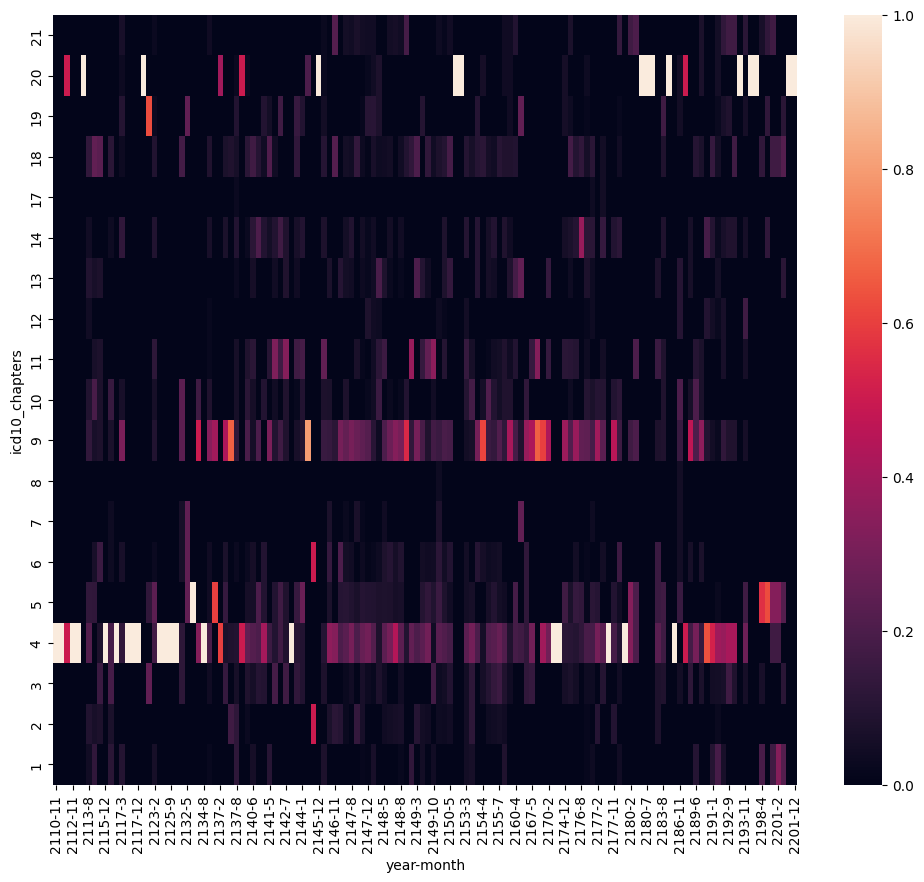

In [24]:
fig, ax = plt.subplots(figsize=(12,10))

plot_df = icd10_chapters_rel_freq.drop('visit_start_date', axis=1).astype('float').T
plot_df.index = plot_df.index.astype('int')


sns.heatmap(plot_df.sort_index(ascending=False), ax=ax)

<Axes: xlabel='year-month', ylabel='ccsr_code'>

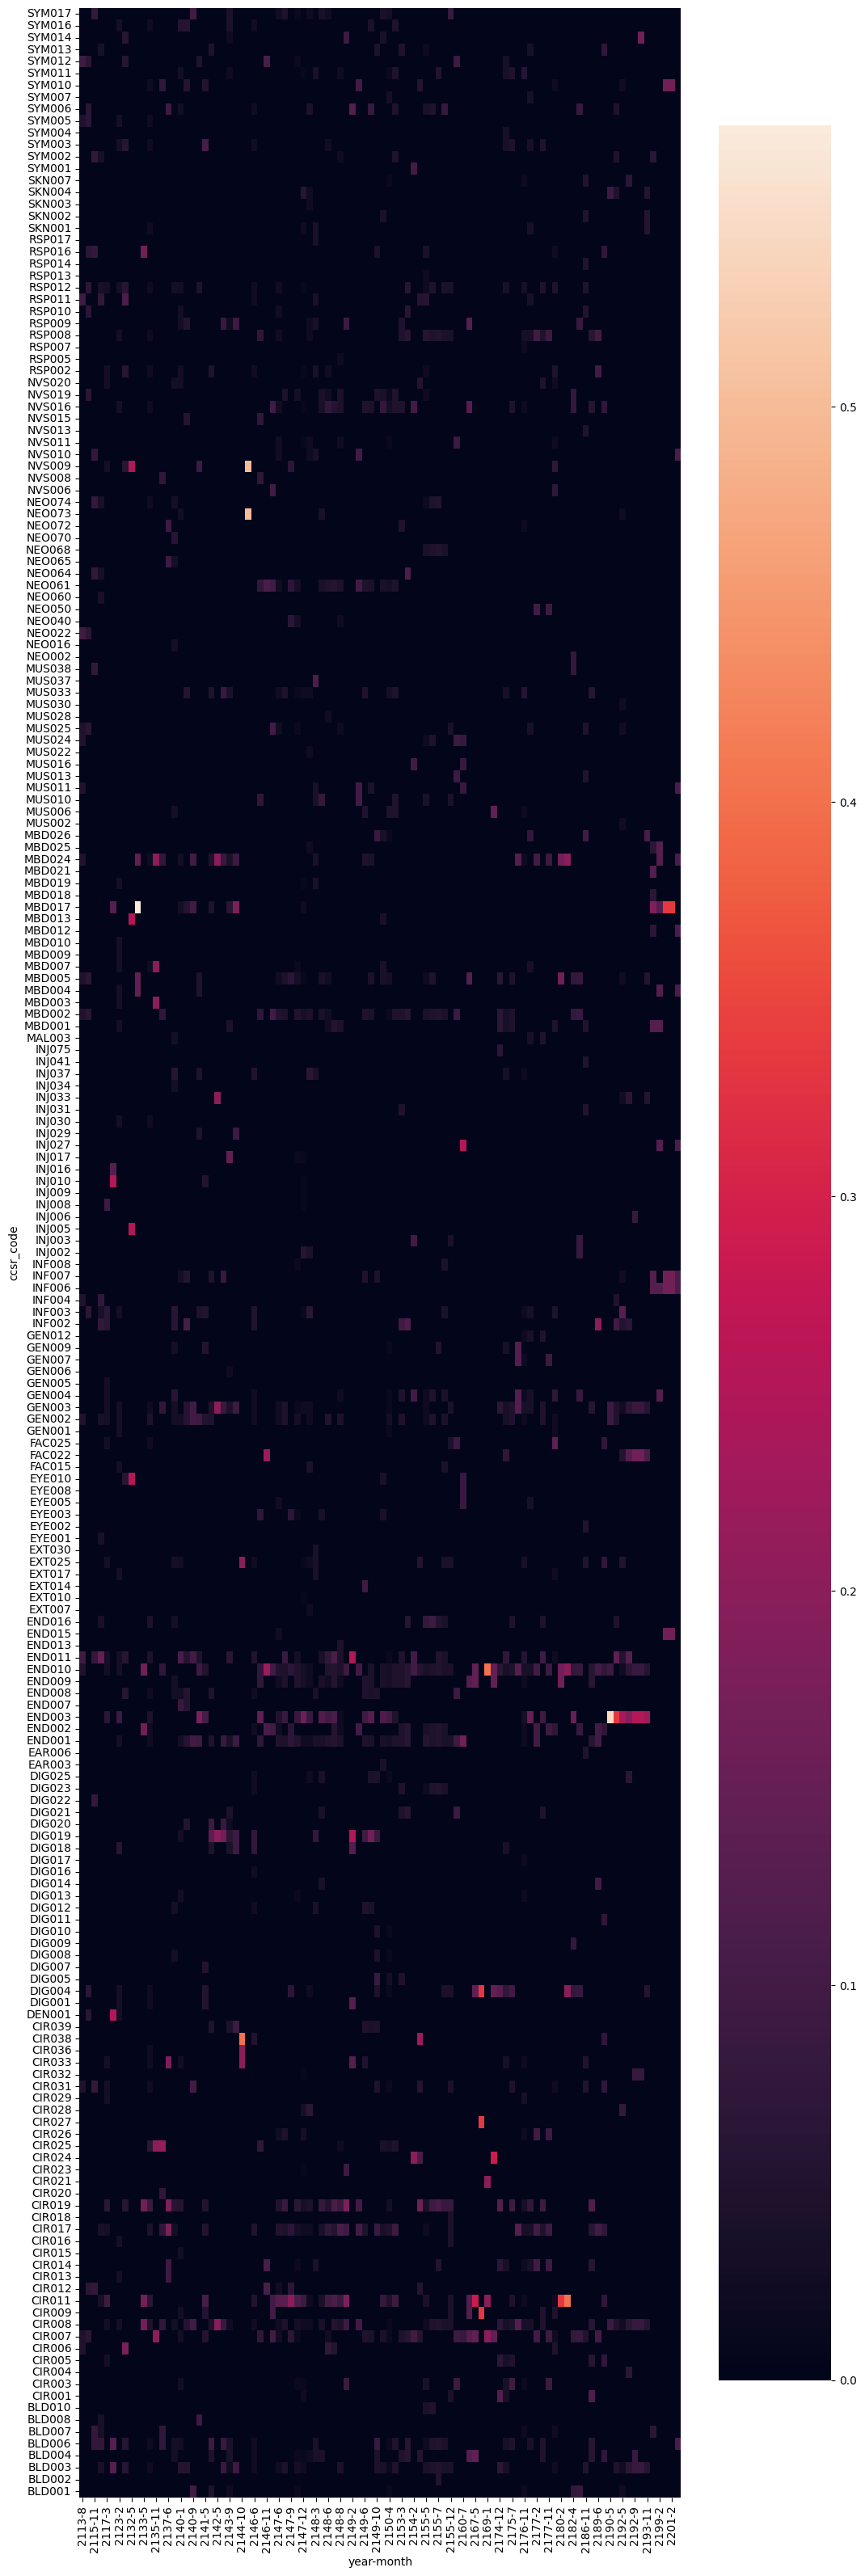

In [25]:
fig, ax = plt.subplots(figsize=(12,40))

plot_df = cccr_rel_freq.drop('visit_start_date', axis=1).astype('float').T
# plot_df.index = plot_df.index.astype('int')


sns.heatmap(plot_df.sort_index(ascending=False), ax=ax)

In [26]:
diagnostics_df = visit_condition_df[visit_condition_df['ccsr_code'].notnull() & visit_condition_df['icd10_chapters'].notnull()]

structured_df_dict = {}
for chapter in diagnostics_df['icd10_chapters'].unique():
      
    structured_df_dict[chapter] = {'dataframe': diagnostics_df[diagnostics_df['icd10_chapters'] == chapter].drop(['icd10_chapters'], axis=1)}
    ccsr_abs_freq, ccsr_rel_freq = monthly_freq_tables(structured_df_dict[chapter]['dataframe'], 'ccsr_code')                                 
    structured_df_dict[chapter].update({'ccsr_abs_freq': ccsr_abs_freq, 'ccsr_rel_freq': ccsr_rel_freq})

In [27]:
import numpy as np
from src.change_detector.change_detector import PDFChangeDetector
structured_df_dict['4']['dataframe']

,condition_source_value,visit_occurrence_id,visit_start_date,ccsr_code
75,E785,5773706737162663913,2169-01-14,END010
79,E780,5773706737162663913,2169-01-14,END010
178,E7800,1798935802963522191,2133-05-04,END010
181,E119,1798935802963522191,2133-05-04,END002
201,E1165,-4270762634631771871,2149-06-19,END003
...,...,...,...,...
3928,E785,-8810053274755713406,2147-12-29,END010
3937,E119,-9037028963168042376,2147-04-26,END002
3939,E785,-9037028963168042376,2147-04-26,END010
3949,E785,1482978734335253228,2154-04-24,END010


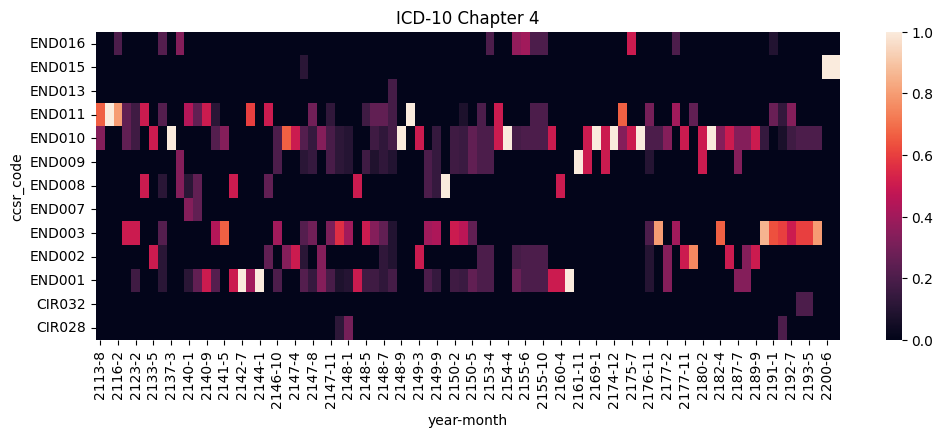

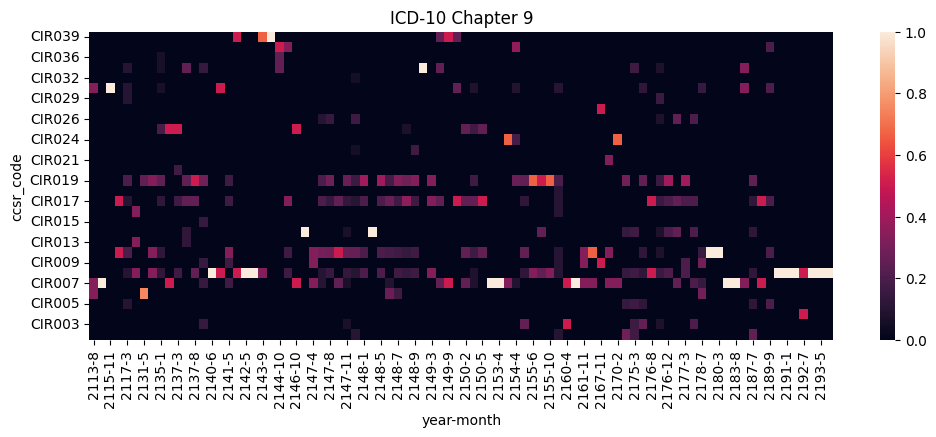

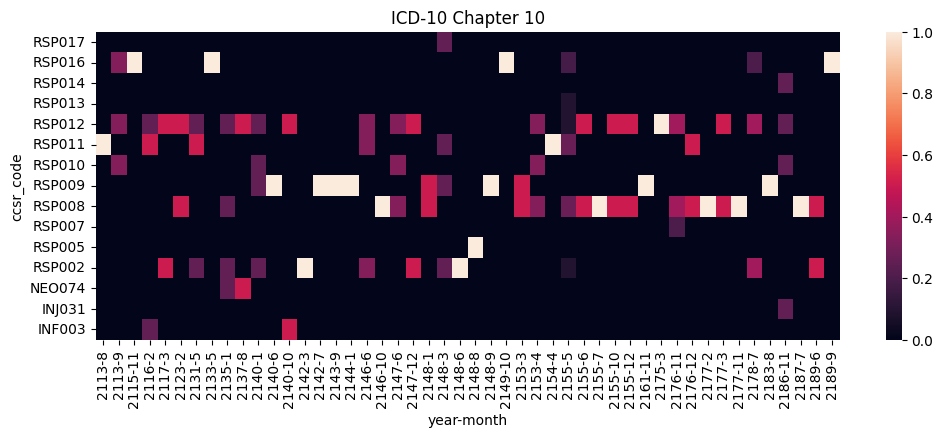

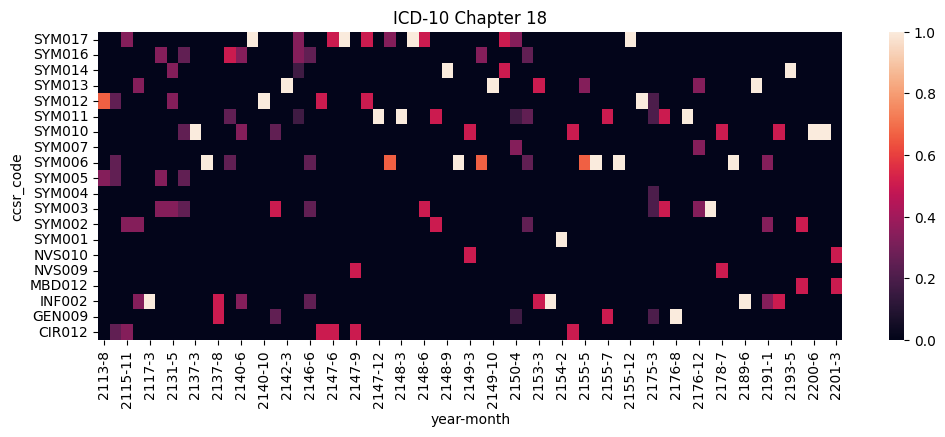

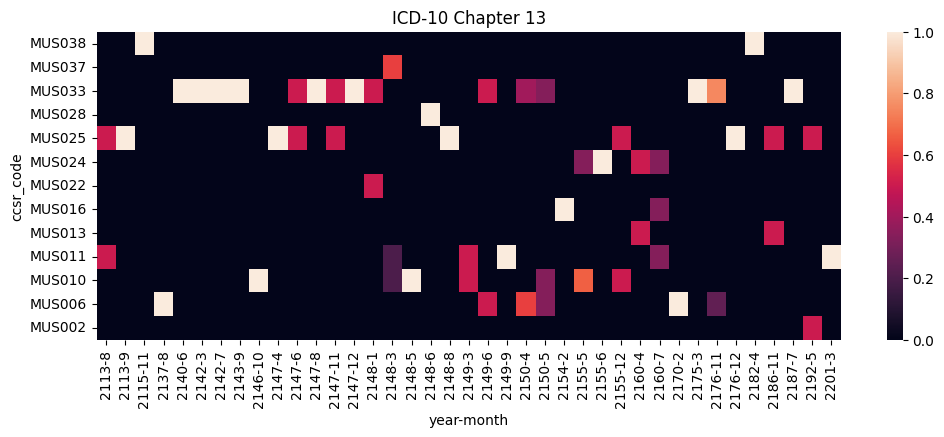

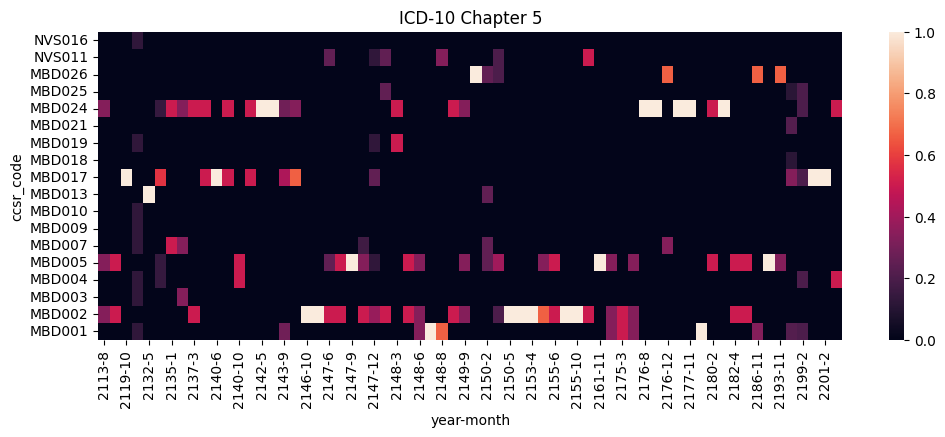

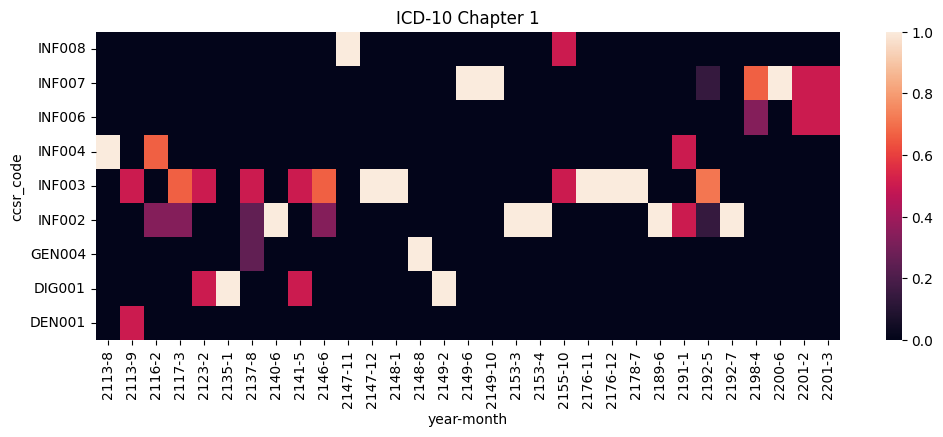

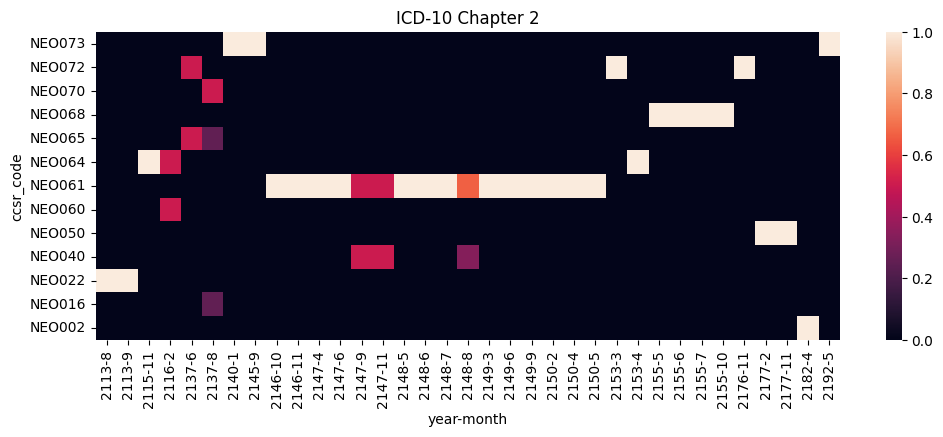

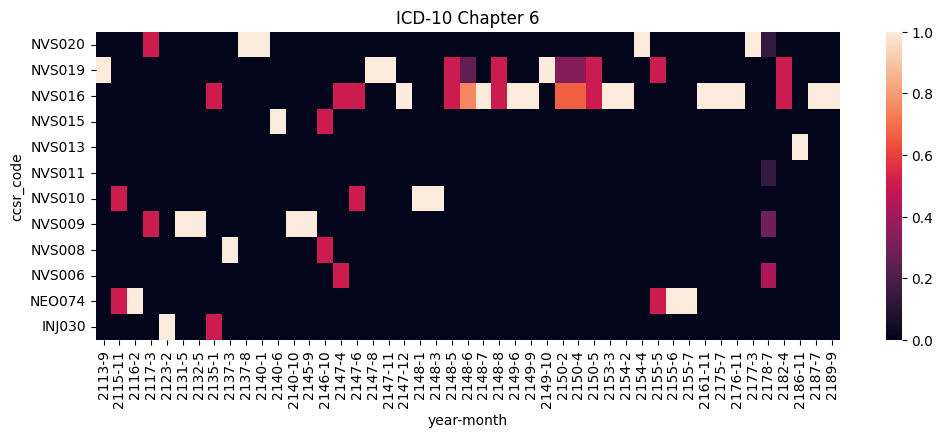

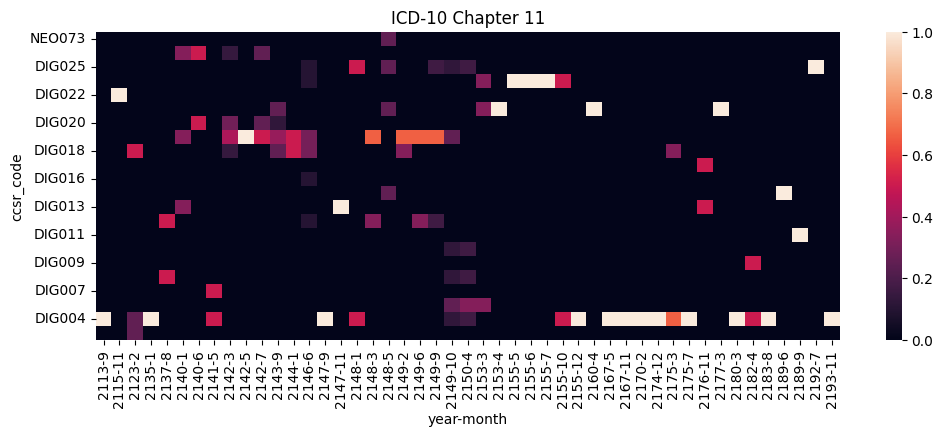

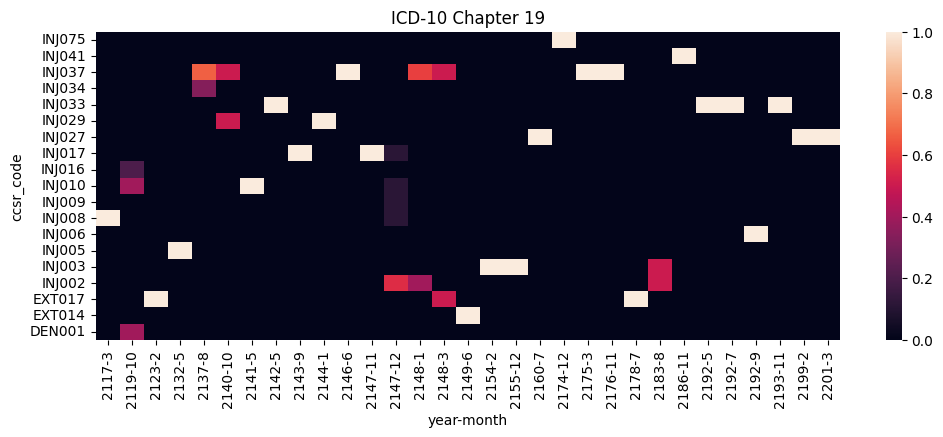

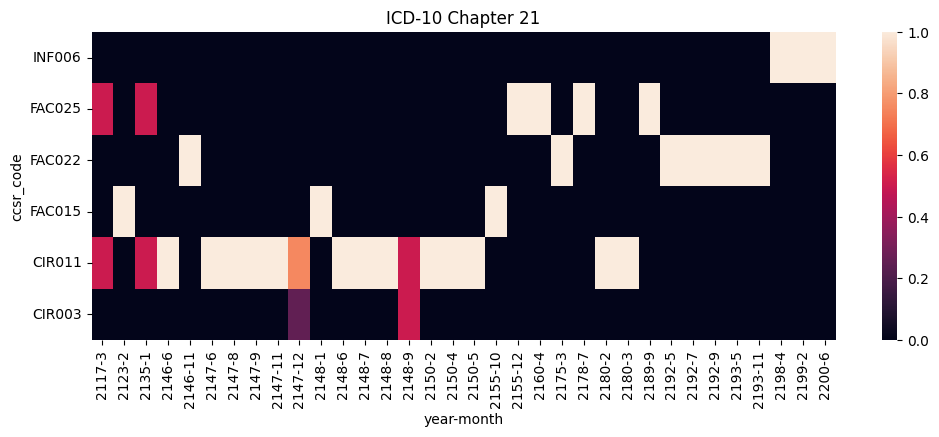

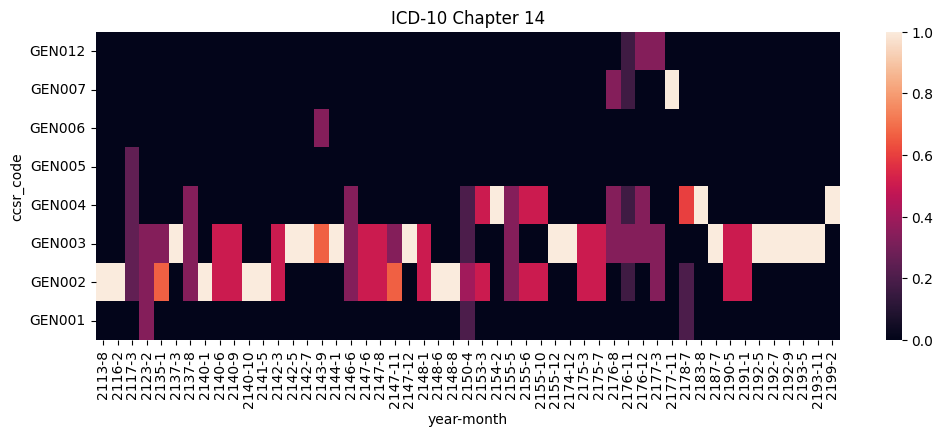

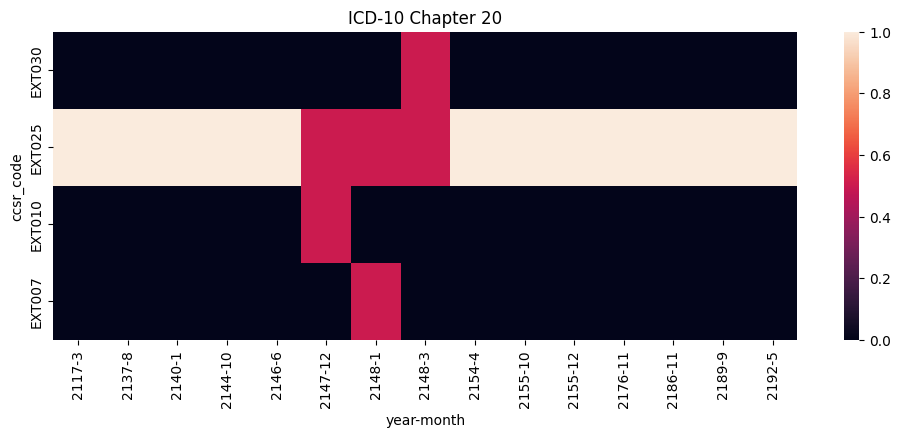

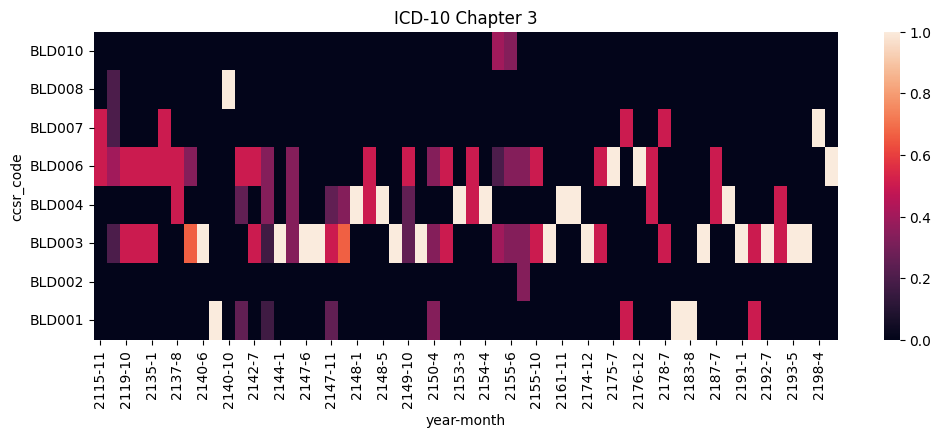

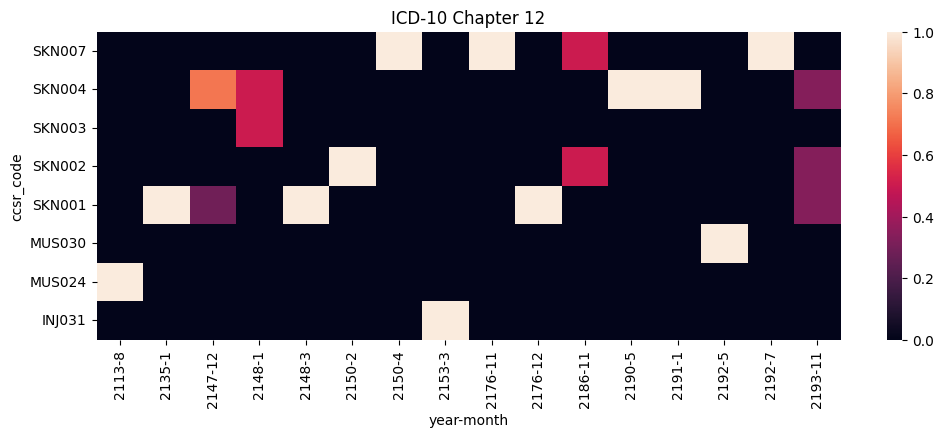

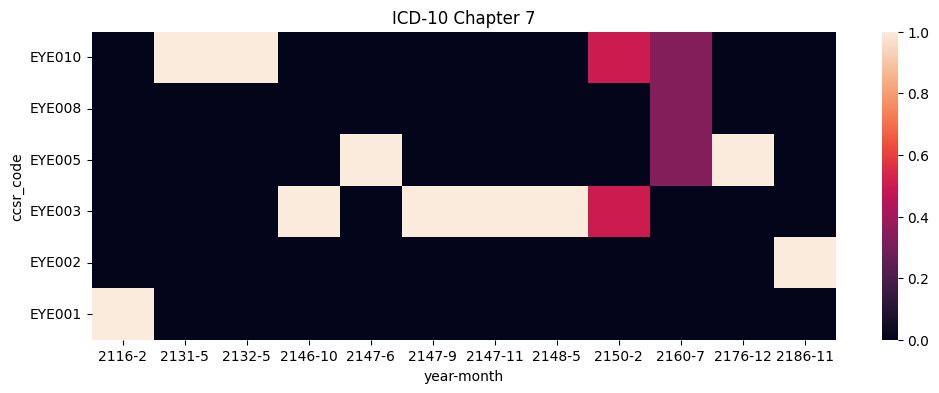

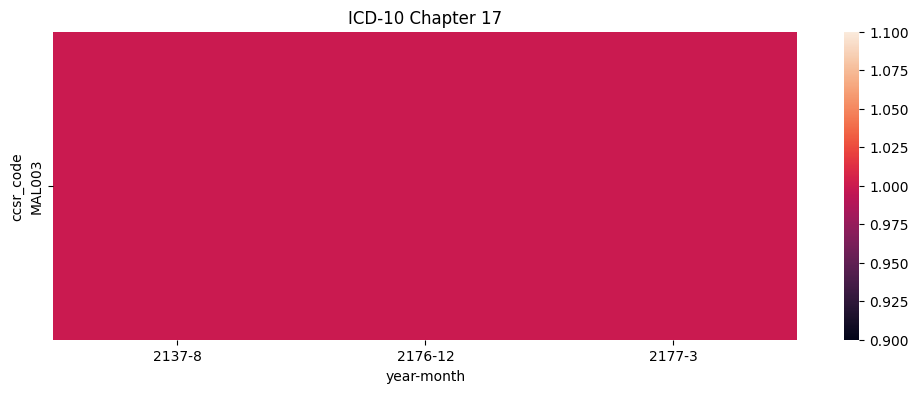

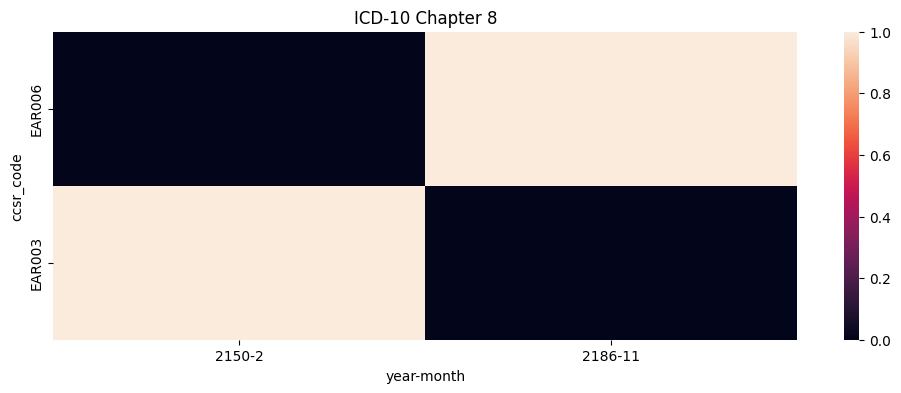

In [28]:
# getting the heatmap for ICD-10 Chapter 4
for chapter, content in structured_df_dict.items():
    
    
    fig, ax = plt.subplots(figsize=(12,4), )
    plot_df = content['ccsr_rel_freq'].drop('visit_start_date', axis=1).astype('float').T
    plt.title(f'ICD-10 Chapter {chapter}')

    sns.heatmap(plot_df.sort_index(ascending=False), ax=ax)


PDF number 0 - year (2113, 8):
0
*****

PDF number 1 - year (2115, 11):
0
*****

PDF number 2 - year (2116, 2):
0
*****

PDF number 3 - year (2117, 3):
0
*****

PDF number 4 - year (2123, 2):
1
*****

PDF number 5 - year (2131, 5):
2
*****

PDF number 6 - year (2133, 5):
0
*****

PDF number 7 - year (2135, 1):
0
*****

PDF number 8 - year (2137, 3):
2
*****

PDF number 9 - year (2137, 8):
0
*****

PDF number 10 - year (2140, 1):
0
*****

PDF number 11 - year (2140, 6):
1
*****

PDF number 12 - year (2140, 9):
2
*****

PDF number 13 - year (2140, 10):
0
*****

PDF number 14 - year (2141, 5):
0
*****

PDF number 15 - year (2142, 3):
0
*****

PDF number 16 - year (2142, 7):
0
*****

PDF number 17 - year (2143, 9):
0
*****

PDF number 18 - year (2144, 1):
0
*****

PDF number 19 - year (2146, 6):
0
*****

PDF number 20 - year (2146, 10):
0
*****

PDF number 21 - year (2146, 11):
0
*****

PDF number 22 - year (2147, 4):
0
*****

PDF number 23 - year (2147, 6):
1
*****

PDF number 24 - year (

/home/pedro/MECD/TESE/code/src/change_detector/stats_and_distance/stats_and_distance.py:21: RuntimeWarning: divide by zero encountered in log
  return np.exp((1/order)*np.log(new_value)+((order-1)/order)*np.log(previous_value))


PDF number 0 - year (2113, 8):
0
*****

PDF number 1 - year (2113, 9):
0
*****

PDF number 2 - year (2115, 11):
0
*****

PDF number 3 - year (2116, 2):
0
*****

PDF number 4 - year (2117, 3):
0
*****

PDF number 5 - year (2123, 2):
1
*****

PDF number 6 - year (2131, 5):
1
*****

PDF number 7 - year (2133, 5):
1
*****

PDF number 8 - year (2135, 1):
2
*****

PDF number 9 - year (2137, 8):
0
*****

PDF number 10 - year (2140, 1):
0
*****

PDF number 11 - year (2140, 6):
1
*****

PDF number 12 - year (2140, 10):
2
*****

PDF number 13 - year (2142, 3):
0
*****

PDF number 14 - year (2142, 7):
0
*****

PDF number 15 - year (2143, 9):
1
*****

PDF number 16 - year (2144, 1):
2
*****

PDF number 17 - year (2146, 6):
0
*****

PDF number 18 - year (2146, 10):
0
*****

PDF number 19 - year (2147, 6):
1
*****

PDF number 20 - year (2147, 12):
2
*****

PDF number 21 - year (2148, 1):
0
*****

PDF number 22 - year (2148, 3):
0
*****

PDF number 23 - year (2148, 6):
0
*****

PDF number 24 - year (

/home/pedro/MECD/TESE/code/src/change_detector/stats_and_distance/stats_and_distance.py:21: RuntimeWarning: divide by zero encountered in log
  return np.exp((1/order)*np.log(new_value)+((order-1)/order)*np.log(previous_value))
/home/pedro/MECD/TESE/code/src/change_detector/change_detector.py:58: RuntimeWarning: invalid value encountered in scalar divide
  self._estimated_alpha = 1/2*(1+self._dist_geo_mean/(1-self._dist_geo_mean-self._complementary_dist_geo_mean))
/home/pedro/MECD/TESE/code/src/change_detector/change_detector.py:59: RuntimeWarning: divide by zero encountered in scalar divide
  self._estimated_beta =  1/2*(1+self._complementary_dist_geo_mean/(1-self._dist_geo_mean-self._complementary_dist_geo_mean))


PDF number 0 - year (2113, 8):
0
*****

PDF number 1 - year (2113, 9):
0
*****

PDF number 2 - year (2119, 10):
0
*****

PDF number 3 - year (2123, 2):
0
*****

PDF number 4 - year (2132, 5):
1
*****

PDF number 5 - year (2133, 3):
1
*****

PDF number 6 - year (2135, 1):
1
*****

PDF number 7 - year (2135, 11):
1
*****

PDF number 8 - year (2137, 3):
1
*****

PDF number 9 - year (2140, 1):
1
*****

PDF number 10 - year (2140, 6):
1
*****

PDF number 11 - year (2140, 9):
1
*****

PDF number 12 - year (2140, 10):
1
*****

PDF number 13 - year (2142, 3):
1
*****

PDF number 14 - year (2142, 5):
1
*****

PDF number 15 - year (2142, 7):
1
*****

PDF number 16 - year (2143, 9):
1
*****

PDF number 17 - year (2144, 1):
1
*****

PDF number 18 - year (2146, 10):
1
*****

PDF number 19 - year (2147, 4):
1
*****

PDF number 20 - year (2147, 6):
1
*****

PDF number 21 - year (2147, 8):
1
*****

PDF number 22 - year (2147, 9):
1
*****

PDF number 23 - year (2147, 11):
1
*****

PDF number 24 - year 

/home/pedro/MECD/TESE/code/src/change_detector/stats_and_distance/stats_and_distance.py:21: RuntimeWarning: divide by zero encountered in log
  return np.exp((1/order)*np.log(new_value)+((order-1)/order)*np.log(previous_value))
/home/pedro/MECD/TESE/code/src/change_detector/change_detector.py:58: RuntimeWarning: invalid value encountered in scalar divide
  self._estimated_alpha = 1/2*(1+self._dist_geo_mean/(1-self._dist_geo_mean-self._complementary_dist_geo_mean))
/home/pedro/MECD/TESE/code/src/change_detector/change_detector.py:59: RuntimeWarning: divide by zero encountered in scalar divide
  self._estimated_beta =  1/2*(1+self._complementary_dist_geo_mean/(1-self._dist_geo_mean-self._complementary_dist_geo_mean))


PDF number 0 - year (2113, 8):
0
*****

PDF number 1 - year (2113, 9):
0
*****

PDF number 2 - year (2115, 11):
0
*****

PDF number 3 - year (2116, 2):
0
*****

PDF number 4 - year (2137, 6):
0
*****

PDF number 5 - year (2137, 8):
0
*****

PDF number 6 - year (2140, 1):
1
*****

PDF number 7 - year (2145, 9):
1
*****

PDF number 8 - year (2146, 10):
1
*****

PDF number 9 - year (2146, 11):
1
*****

PDF number 10 - year (2147, 4):
1
*****

PDF number 11 - year (2147, 6):
1
*****

PDF number 12 - year (2147, 9):
1
*****

PDF number 13 - year (2147, 11):
1
*****

PDF number 14 - year (2148, 5):
1
*****

PDF number 15 - year (2148, 6):
1
*****

PDF number 16 - year (2148, 7):
1
*****

PDF number 17 - year (2148, 8):
1
*****

PDF number 18 - year (2149, 3):
1
*****

PDF number 19 - year (2149, 6):
1
*****

PDF number 20 - year (2149, 9):
1
*****

PDF number 21 - year (2150, 2):
1
*****

PDF number 22 - year (2150, 4):
1
*****

PDF number 23 - year (2150, 5):
1
*****

PDF number 24 - year (

/home/pedro/MECD/TESE/code/src/change_detector/stats_and_distance/stats_and_distance.py:21: RuntimeWarning: divide by zero encountered in log
  return np.exp((1/order)*np.log(new_value)+((order-1)/order)*np.log(previous_value))


PDF number 0 - year (2113, 9):
0
*****

PDF number 1 - year (2115, 11):
0
*****

PDF number 2 - year (2116, 2):
0
*****

PDF number 3 - year (2117, 3):
1
*****

PDF number 4 - year (2123, 2):
2
*****

PDF number 5 - year (2131, 5):
0
*****

PDF number 6 - year (2132, 5):
0
*****

PDF number 7 - year (2135, 1):
0
*****

PDF number 8 - year (2137, 3):
0
*****

PDF number 9 - year (2137, 8):
1
*****

PDF number 10 - year (2140, 1):
2
*****

PDF number 11 - year (2140, 6):
0
*****

PDF number 12 - year (2140, 10):
0
*****

PDF number 13 - year (2145, 9):
1
*****

PDF number 14 - year (2146, 10):
2
*****

PDF number 15 - year (2147, 4):
0
*****

PDF number 16 - year (2147, 6):
0
*****

PDF number 17 - year (2147, 8):
1
*****

PDF number 18 - year (2147, 11):
2
*****

PDF number 19 - year (2147, 12):
0
*****

PDF number 20 - year (2148, 1):
0
*****

PDF number 21 - year (2148, 3):
1
*****

PDF number 22 - year (2148, 5):
0
*****

PDF number 23 - year (2148, 6):
0
*****

PDF number 24 - year 

/home/pedro/MECD/TESE/code/src/change_detector/stats_and_distance/stats_and_distance.py:21: RuntimeWarning: divide by zero encountered in log
  return np.exp((1/order)*np.log(new_value)+((order-1)/order)*np.log(previous_value))


PDF number 0 - year (2113, 9):
0
*****

PDF number 1 - year (2115, 11):
0
*****

PDF number 2 - year (2123, 2):
0
*****

PDF number 3 - year (2135, 1):
0
*****

PDF number 4 - year (2137, 8):
0
*****

PDF number 5 - year (2140, 1):
1
*****

PDF number 6 - year (2140, 6):
2
*****

PDF number 7 - year (2141, 5):
0
*****

PDF number 8 - year (2142, 3):
0
*****

PDF number 9 - year (2142, 5):
2
*****

PDF number 10 - year (2142, 7):
0
*****

PDF number 11 - year (2143, 9):
0
*****

PDF number 12 - year (2144, 1):
0
*****

PDF number 13 - year (2146, 6):
1
*****

PDF number 14 - year (2147, 9):
2
*****

PDF number 15 - year (2147, 11):
0
*****

PDF number 16 - year (2148, 1):
0
*****

PDF number 17 - year (2148, 3):
2
*****

PDF number 18 - year (2148, 5):
0
*****

PDF number 19 - year (2149, 2):
0
*****

PDF number 20 - year (2149, 6):
0
*****

PDF number 21 - year (2149, 9):
0
*****

PDF number 22 - year (2149, 10):
0
*****

PDF number 23 - year (2150, 4):
1
*****

PDF number 24 - year (2

/home/pedro/MECD/TESE/code/src/change_detector/stats_and_distance/stats_and_distance.py:21: RuntimeWarning: divide by zero encountered in log
  return np.exp((1/order)*np.log(new_value)+((order-1)/order)*np.log(previous_value))


0
*****

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [0]
 [0]
 [0]
 [0]]
PDF number 0 - year (2113, 8):
0
*****

PDF number 1 - year (2116, 2):
0
*****

PDF number 2 - year (2117, 3):
0
*****

PDF number 3 - year (2123, 2):
0
*****

PDF number 4 - year (2135, 1):
0
*****

PDF number 5 - year (2137, 3):
0
*****

PDF number 6 - year (2137, 8):
0
*****

PDF number 7 - year (2140, 1):
0
*****

PDF number 8 - year (2140, 6):
0
*****

PDF number 9 - year (2140, 9):
0
*****

PDF number 10 - year (2140, 10):
0
*****

PDF number 11 - year (2141, 5):
0
*****

PDF number 12 - year (2142, 3):
0
*****

PDF number 13 - year (2142, 5):
0
*****

PDF number 14 - year (2142, 7):
0
*****

PDF number 15 - year (2143, 9):
0
*****

PDF number 16 - year (2144, 1):
1
*****

PDF number 17 - year (2146, 6):
1
*****

PDF number 18 - year (2147, 6):
1
*****

PDF number 19 - year (2147, 8):
1
*****

PDF numbe

/home/pedro/MECD/TESE/code/src/change_detector/stats_and_distance/stats_and_distance.py:21: RuntimeWarning: divide by zero encountered in log
  return np.exp((1/order)*np.log(new_value)+((order-1)/order)*np.log(previous_value))


PDF number 0 - year (2117, 3):
0
*****

PDF number 1 - year (2137, 8):
0
*****

PDF number 2 - year (2140, 1):
2
*****

PDF number 3 - year (2144, 10):
0
*****

PDF number 4 - year (2146, 6):
2
*****

PDF number 5 - year (2147, 12):
0
*****

PDF number 6 - year (2148, 1):
0
*****

PDF number 7 - year (2148, 3):
0
*****

PDF number 8 - year (2154, 4):
0
*****

PDF number 9 - year (2155, 10):
0
*****

PDF number 10 - year (2155, 12):
0
*****

PDF number 11 - year (2176, 11):
0
*****

PDF number 12 - year (2186, 11):
0
*****

PDF number 13 - year (2189, 9):
0
*****

PDF number 14 - year (2192, 5):
0
*****

[[0]
 [0]
 [2]
 [0]
 [2]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


/home/pedro/MECD/TESE/code/src/change_detector/stats_and_distance/stats_and_distance.py:21: RuntimeWarning: divide by zero encountered in log
  return np.exp((1/order)*np.log(new_value)+((order-1)/order)*np.log(previous_value))
/home/pedro/MECD/TESE/code/src/change_detector/change_detector.py:58: RuntimeWarning: invalid value encountered in scalar divide
  self._estimated_alpha = 1/2*(1+self._dist_geo_mean/(1-self._dist_geo_mean-self._complementary_dist_geo_mean))
/home/pedro/MECD/TESE/code/src/change_detector/change_detector.py:59: RuntimeWarning: divide by zero encountered in scalar divide
  self._estimated_beta =  1/2*(1+self._complementary_dist_geo_mean/(1-self._dist_geo_mean-self._complementary_dist_geo_mean))


PDF number 0 - year (2115, 11):
0
*****

PDF number 1 - year (2116, 2):
0
*****

PDF number 2 - year (2119, 10):
0
*****

PDF number 3 - year (2131, 5):
1
*****

PDF number 4 - year (2135, 1):
1
*****

PDF number 5 - year (2137, 3):
1
*****

PDF number 6 - year (2137, 8):
1
*****

PDF number 7 - year (2140, 1):
1
*****

PDF number 8 - year (2140, 6):
2
*****

PDF number 9 - year (2140, 9):
0
*****

PDF number 10 - year (2140, 10):
0
*****

PDF number 11 - year (2142, 3):
1
*****

PDF number 12 - year (2142, 7):
0
*****

PDF number 13 - year (2143, 9):
0
*****

PDF number 14 - year (2144, 1):
0
*****

PDF number 15 - year (2146, 6):
0
*****

PDF number 16 - year (2147, 6):
0
*****

PDF number 17 - year (2147, 8):
0
*****

PDF number 18 - year (2147, 11):
0
*****

PDF number 19 - year (2147, 12):
0
*****

PDF number 20 - year (2148, 1):
0
*****

PDF number 21 - year (2148, 3):
0
*****

PDF number 22 - year (2148, 5):
0
*****

PDF number 23 - year (2148, 8):
0
*****

PDF number 24 - year 

/home/pedro/MECD/TESE/code/src/change_detector/stats_and_distance/stats_and_distance.py:21: RuntimeWarning: divide by zero encountered in log
  return np.exp((1/order)*np.log(new_value)+((order-1)/order)*np.log(previous_value))


PDF number 0 - year (2116, 2):
0
*****

PDF number 1 - year (2131, 5):
0
*****

PDF number 2 - year (2132, 5):
0
*****

PDF number 3 - year (2146, 10):
1
*****

PDF number 4 - year (2147, 6):
2
*****

PDF number 5 - year (2147, 9):
0
*****

PDF number 6 - year (2147, 11):
0
*****

PDF number 7 - year (2148, 5):
1
*****

PDF number 8 - year (2150, 2):
2
*****

PDF number 9 - year (2160, 7):
0
*****

PDF number 10 - year (2176, 12):
0
*****

PDF number 11 - year (2186, 11):
1
*****

[[0]
 [0]
 [0]
 [1]
 [2]
 [0]
 [0]
 [1]
 [2]
 [0]
 [0]
 [1]]
PDF number 0 - year (2137, 8):
0
*****

PDF number 1 - year (2176, 12):
0
*****

PDF number 2 - year (2177, 3):
2
*****

[[0]
 [0]
 [2]]


/home/pedro/MECD/TESE/code/src/change_detector/stats_and_distance/stats_and_distance.py:21: RuntimeWarning: divide by zero encountered in log
  return np.exp((1/order)*np.log(new_value)+((order-1)/order)*np.log(previous_value))
/home/pedro/MECD/TESE/code/src/change_detector/change_detector.py:58: RuntimeWarning: invalid value encountered in scalar divide
  self._estimated_alpha = 1/2*(1+self._dist_geo_mean/(1-self._dist_geo_mean-self._complementary_dist_geo_mean))
/home/pedro/MECD/TESE/code/src/change_detector/change_detector.py:59: RuntimeWarning: divide by zero encountered in scalar divide
  self._estimated_beta =  1/2*(1+self._complementary_dist_geo_mean/(1-self._dist_geo_mean-self._complementary_dist_geo_mean))


PDF number 0 - year (2150, 2):
0
*****

PDF number 1 - year (2186, 11):
0
*****

[[0]
 [0]]


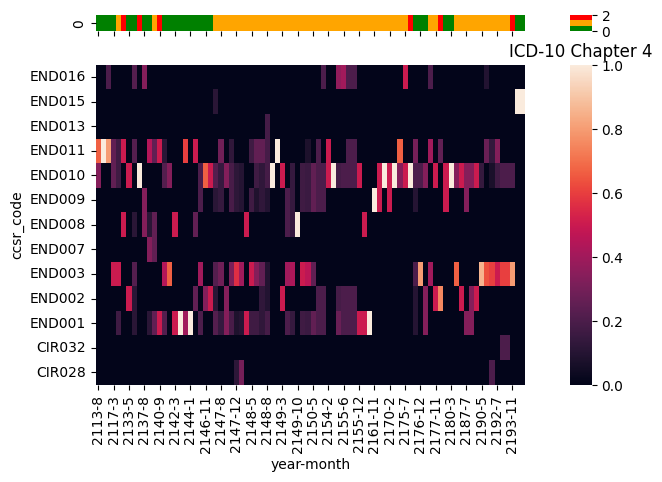

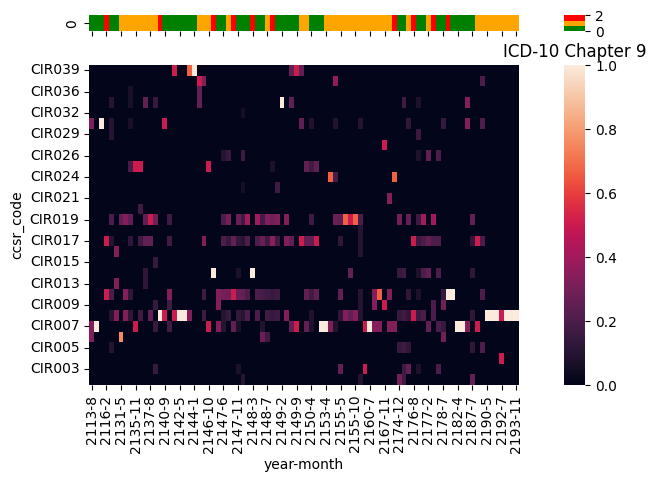

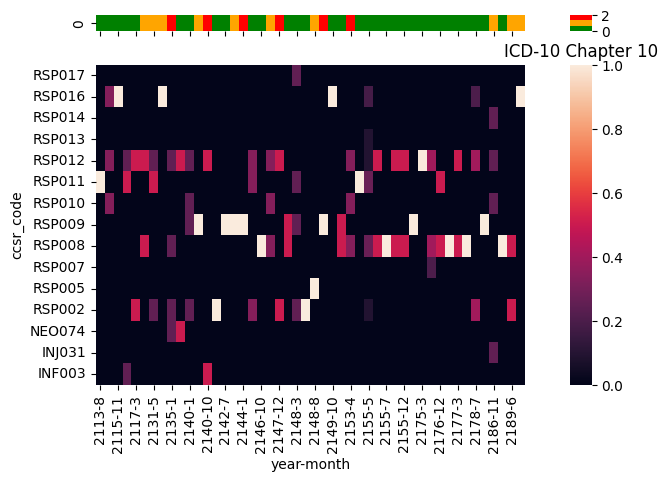

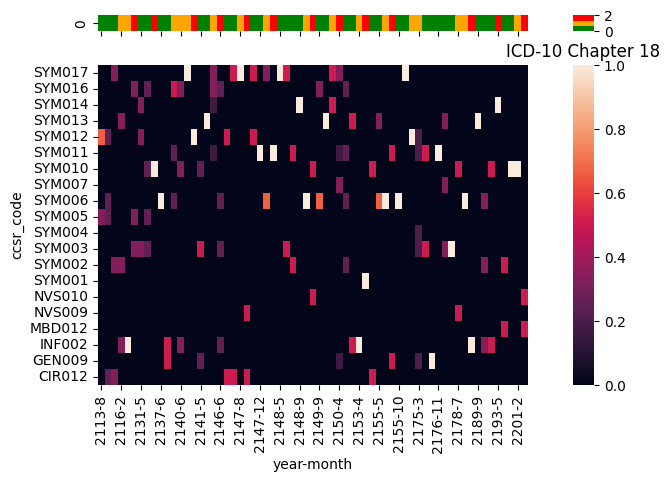

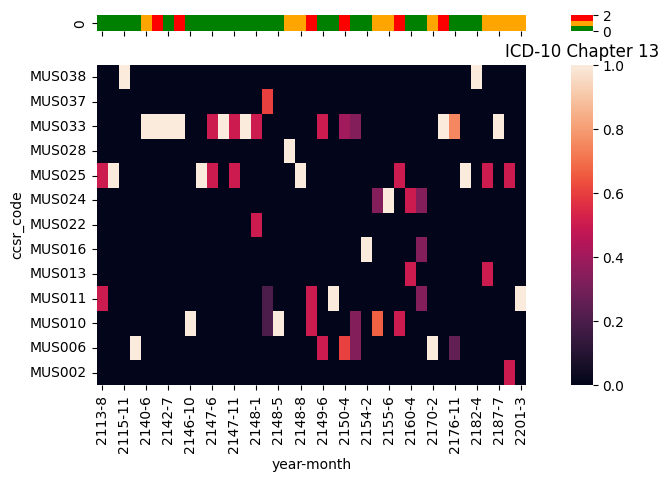

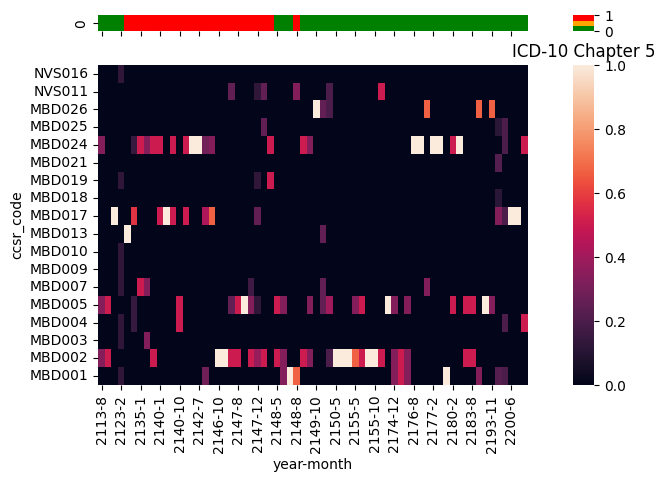

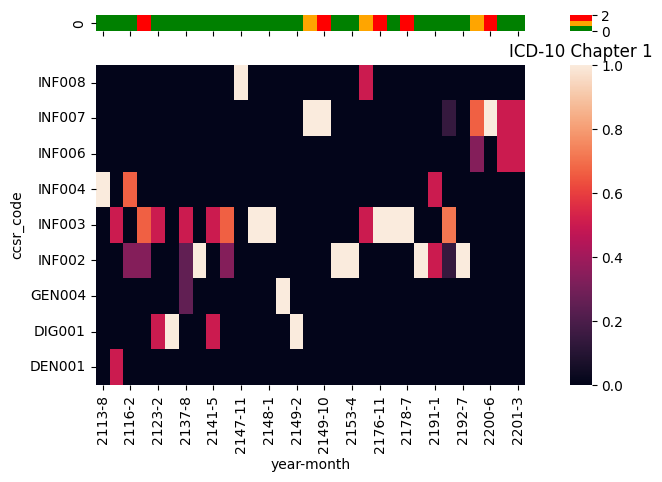

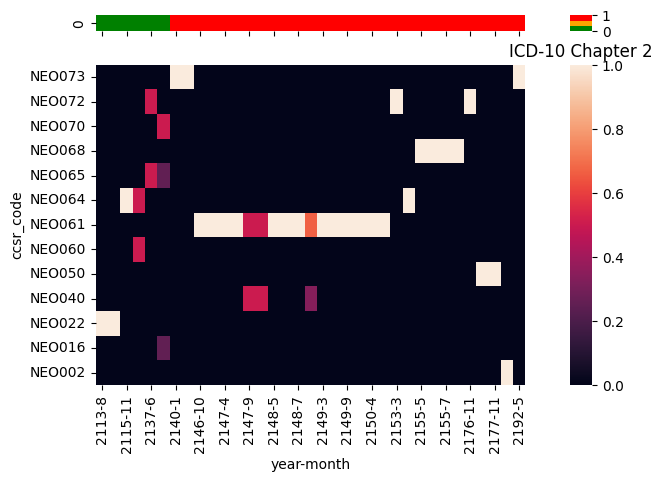

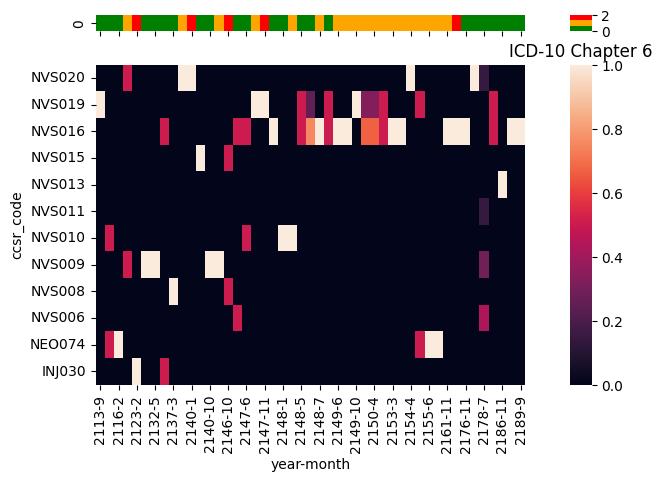

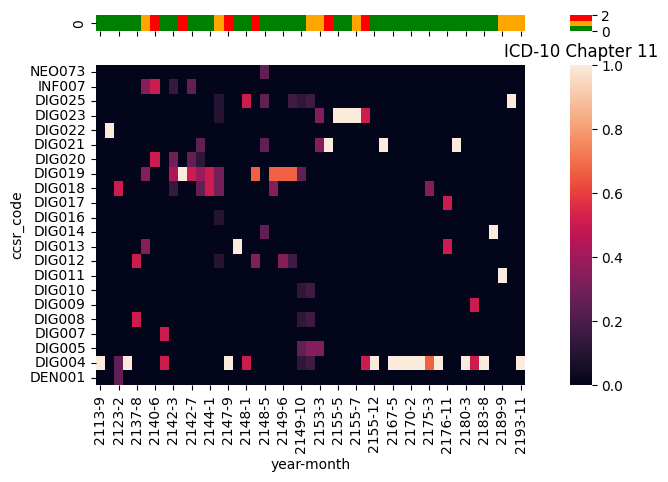

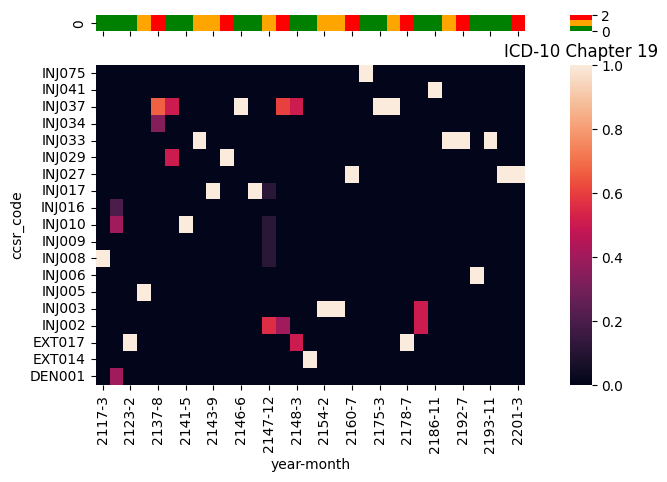

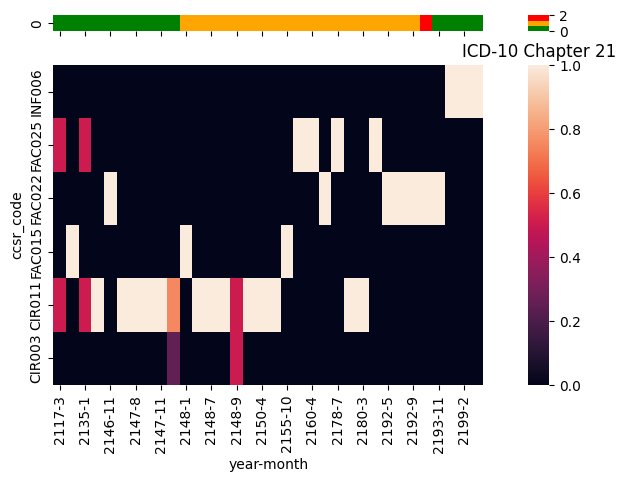

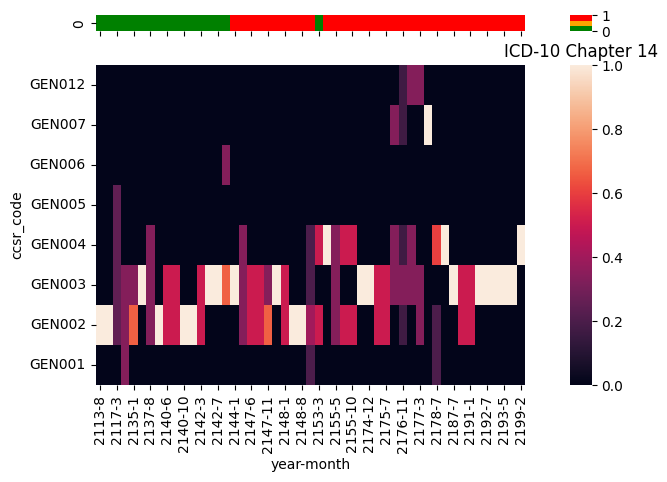

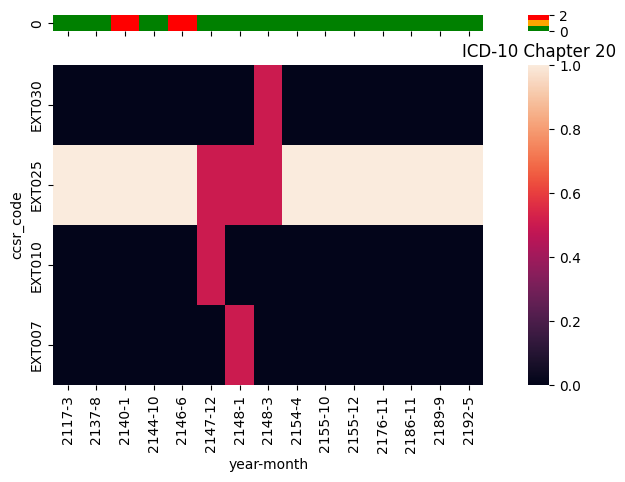

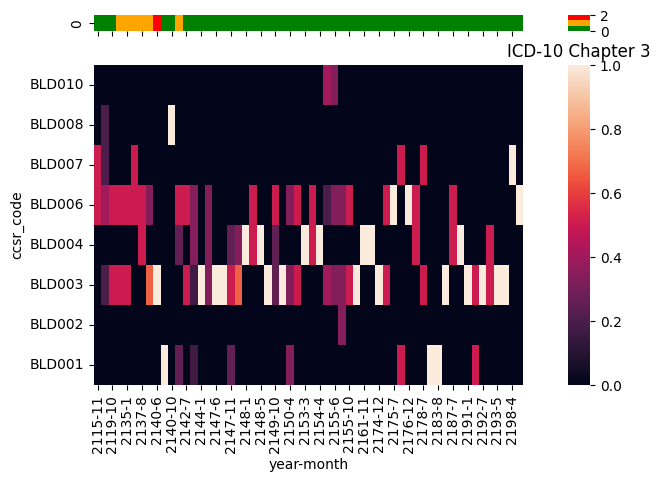

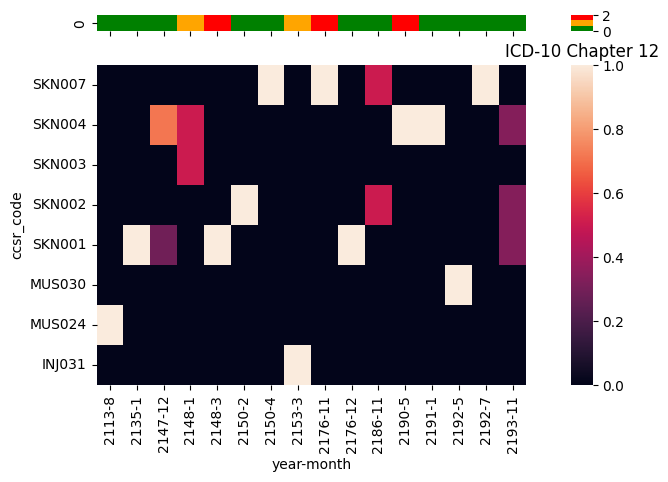

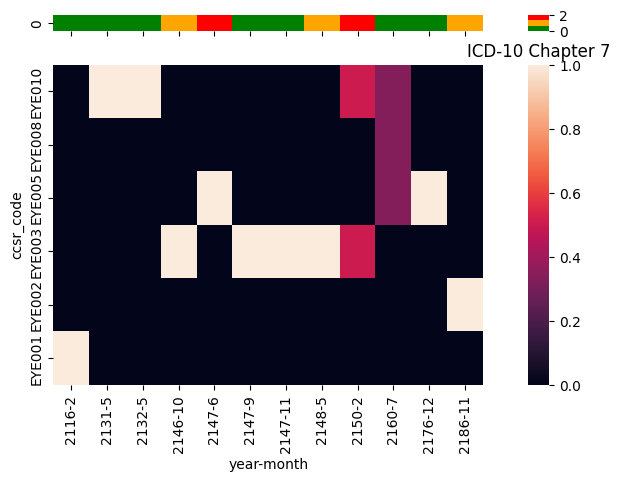

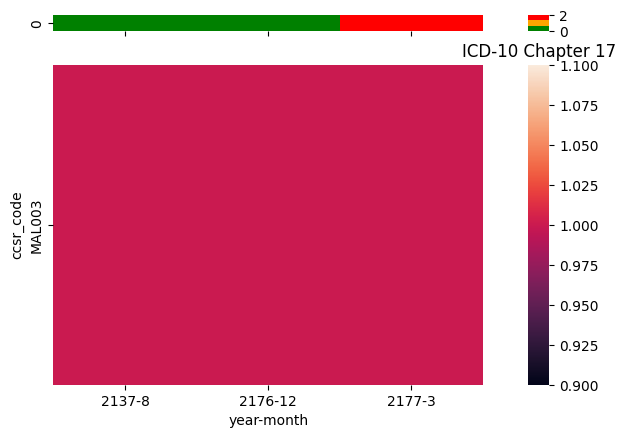

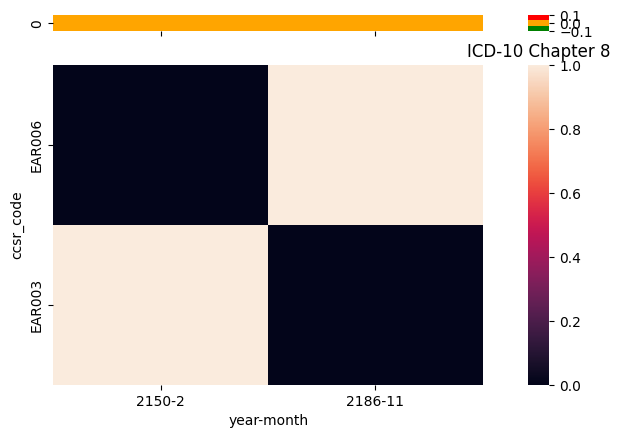

In [31]:
import numpy as np

from matplotlib.colors import ListedColormap

from src.change_detector.change_detector import PDFChangeDetector

for chapter, content in structured_df_dict.items():
    
    rel_freq_table = content['ccsr_rel_freq'].drop('visit_start_date', axis=1)
    
    detector = PDFChangeDetector(a_memory=0.95)

    number_of_periods = rel_freq_table.shape[0]

    state_array = np.empty((number_of_periods,1), dtype='uint8')

    for i in range(number_of_periods):
        print(f"PDF number {i} - year {rel_freq_table.index[i]}:")
        result,_,_ = detector.detect_change(rel_freq_table.iloc[i])
        state_array[i][0] = result.value
        print(result.value)
        print("*****\n")
    print(state_array)
    
    plot_df = rel_freq_table.astype('float').T
    
    fig, ax = plt.subplots(nrows=2,
                        ncols=2, 
                        #    figsize=(12,4),
                        sharex='col',
                        gridspec_kw={'width_ratios':[100,5], 'height_ratios':[5,100]},
                        )
    # ax[0,1].remove()
    plt.title(f'ICD-10 Chapter {chapter}')
    cmap = ListedColormap(["green", "orange", "red"])
    sns.heatmap(state_array.T, ax=ax[0,0], cbar_ax=ax[0,1], cmap=cmap)
    sns.heatmap(plot_df.sort_index(ascending=False), ax=ax[1,0], cbar_ax=ax[1,1])


In [32]:
cmap.colors[0]

'green'

PDF number 0 - year (2113, 8):
0 IN_CONTROL
*****

PDF number 1 - year (2115, 11):
0 IN_CONTROL
*****

PDF number 2 - year (2116, 2):
0 IN_CONTROL
*****

PDF number 3 - year (2117, 3):
0 IN_CONTROL
*****

PDF number 4 - year (2123, 2):
1 WARNING
*****

PDF number 5 - year (2131, 5):
2 OUT_OF_CONTROL
*****

PDF number 6 - year (2133, 5):
0 IN_CONTROL
*****

PDF number 7 - year (2135, 1):
0 IN_CONTROL
*****

PDF number 8 - year (2137, 3):
2 OUT_OF_CONTROL
*****

PDF number 9 - year (2137, 8):
0 IN_CONTROL
*****

PDF number 10 - year (2140, 1):
0 IN_CONTROL
*****

PDF number 11 - year (2140, 6):
1 WARNING
*****

PDF number 12 - year (2140, 9):
2 OUT_OF_CONTROL
*****

PDF number 13 - year (2140, 10):
0 IN_CONTROL
*****

PDF number 14 - year (2141, 5):
0 IN_CONTROL
*****

PDF number 15 - year (2142, 3):
0 IN_CONTROL
*****

PDF number 16 - year (2142, 7):
0 IN_CONTROL
*****

PDF number 17 - year (2143, 9):
0 IN_CONTROL
*****

PDF number 18 - year (2144, 1):
0 IN_CONTROL
*****

PDF number 19 

1 WARNING
*****

PDF number 30 - year (2148, 5):
1 WARNING
*****

PDF number 31 - year (2148, 6):
1 WARNING
*****

PDF number 32 - year (2148, 7):
1 WARNING
*****

PDF number 33 - year (2148, 8):
1 WARNING
*****

PDF number 34 - year (2148, 9):
1 WARNING
*****

PDF number 35 - year (2149, 2):
1 WARNING
*****

PDF number 36 - year (2149, 3):
1 WARNING
*****

PDF number 37 - year (2149, 6):
1 WARNING
*****

PDF number 38 - year (2149, 9):
1 WARNING
*****

PDF number 39 - year (2149, 10):
1 WARNING
*****

PDF number 40 - year (2150, 2):
1 WARNING
*****

PDF number 41 - year (2150, 4):
1 WARNING
*****

PDF number 42 - year (2150, 5):
1 WARNING
*****

PDF number 43 - year (2153, 3):
1 WARNING
*****

PDF number 44 - year (2153, 4):
1 WARNING
*****

PDF number 45 - year (2154, 2):
1 WARNING
*****

PDF number 46 - year (2154, 4):
1 WARNING
*****

PDF number 47 - year (2155, 5):
1 WARNING
*****

PDF number 48 - year (2155, 6):
1 WARNING
*****

PDF number 49 - year (2155, 7):
1 WARNING
*****

PD

/home/pedro/MECD/TESE/code/src/change_detector/stats_and_distance/stats_and_distance.py:21: RuntimeWarning: divide by zero encountered in log
  return np.exp((1/order)*np.log(new_value)+((order-1)/order)*np.log(previous_value))


PDF number 0 - year (2113, 8):
0 IN_CONTROL
*****

PDF number 1 - year (2113, 9):
0 IN_CONTROL
*****

PDF number 2 - year (2115, 11):
0 IN_CONTROL
*****

PDF number 3 - year (2116, 2):
0 IN_CONTROL
*****

PDF number 4 - year (2117, 3):
0 IN_CONTROL
*****

PDF number 5 - year (2123, 2):
1 WARNING
*****

PDF number 6 - year (2131, 5):
1 WARNING
*****

PDF number 7 - year (2133, 5):
1 WARNING
*****

PDF number 8 - year (2135, 1):
2 OUT_OF_CONTROL
*****

PDF number 9 - year (2137, 8):
0 IN_CONTROL
*****

PDF number 10 - year (2140, 1):
0 IN_CONTROL
*****

PDF number 11 - year (2140, 6):
1 WARNING
*****

PDF number 12 - year (2140, 10):
2 OUT_OF_CONTROL
*****

PDF number 13 - year (2142, 3):
0 IN_CONTROL
*****

PDF number 14 - year (2142, 7):
0 IN_CONTROL
*****

PDF number 15 - year (2143, 9):
1 WARNING
*****

PDF number 16 - year (2144, 1):
2 OUT_OF_CONTROL
*****

PDF number 17 - year (2146, 6):
0 IN_CONTROL
*****

PDF number 18 - year (2146, 10):
0 IN_CONTROL
*****

PDF number 19 - year (

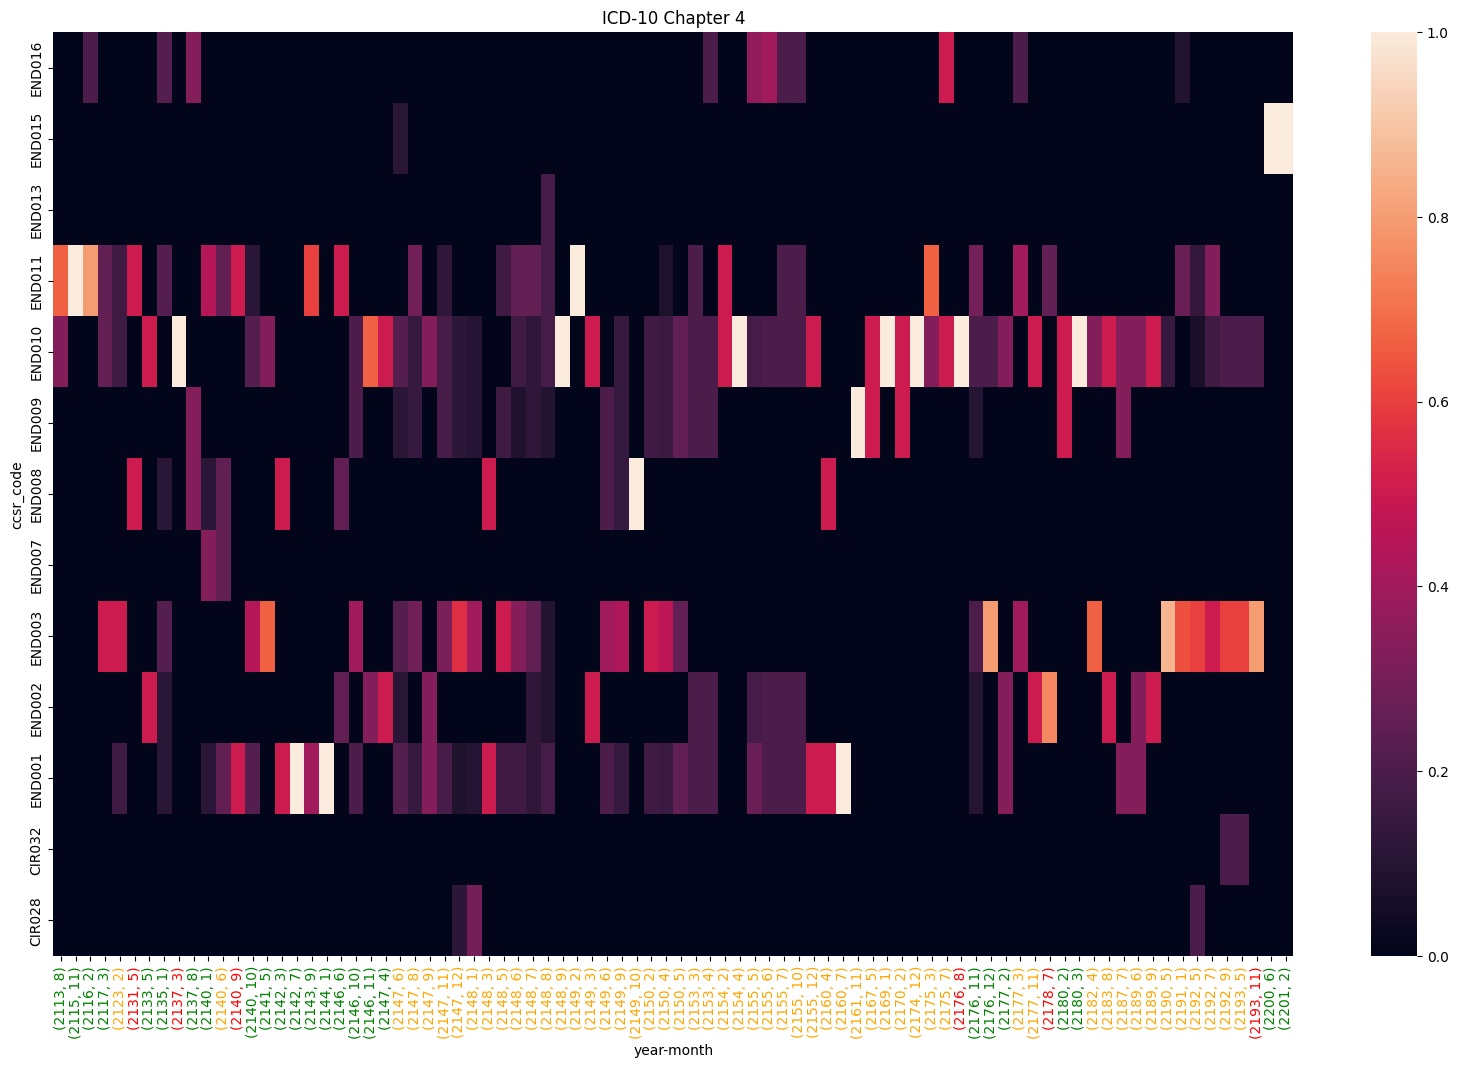

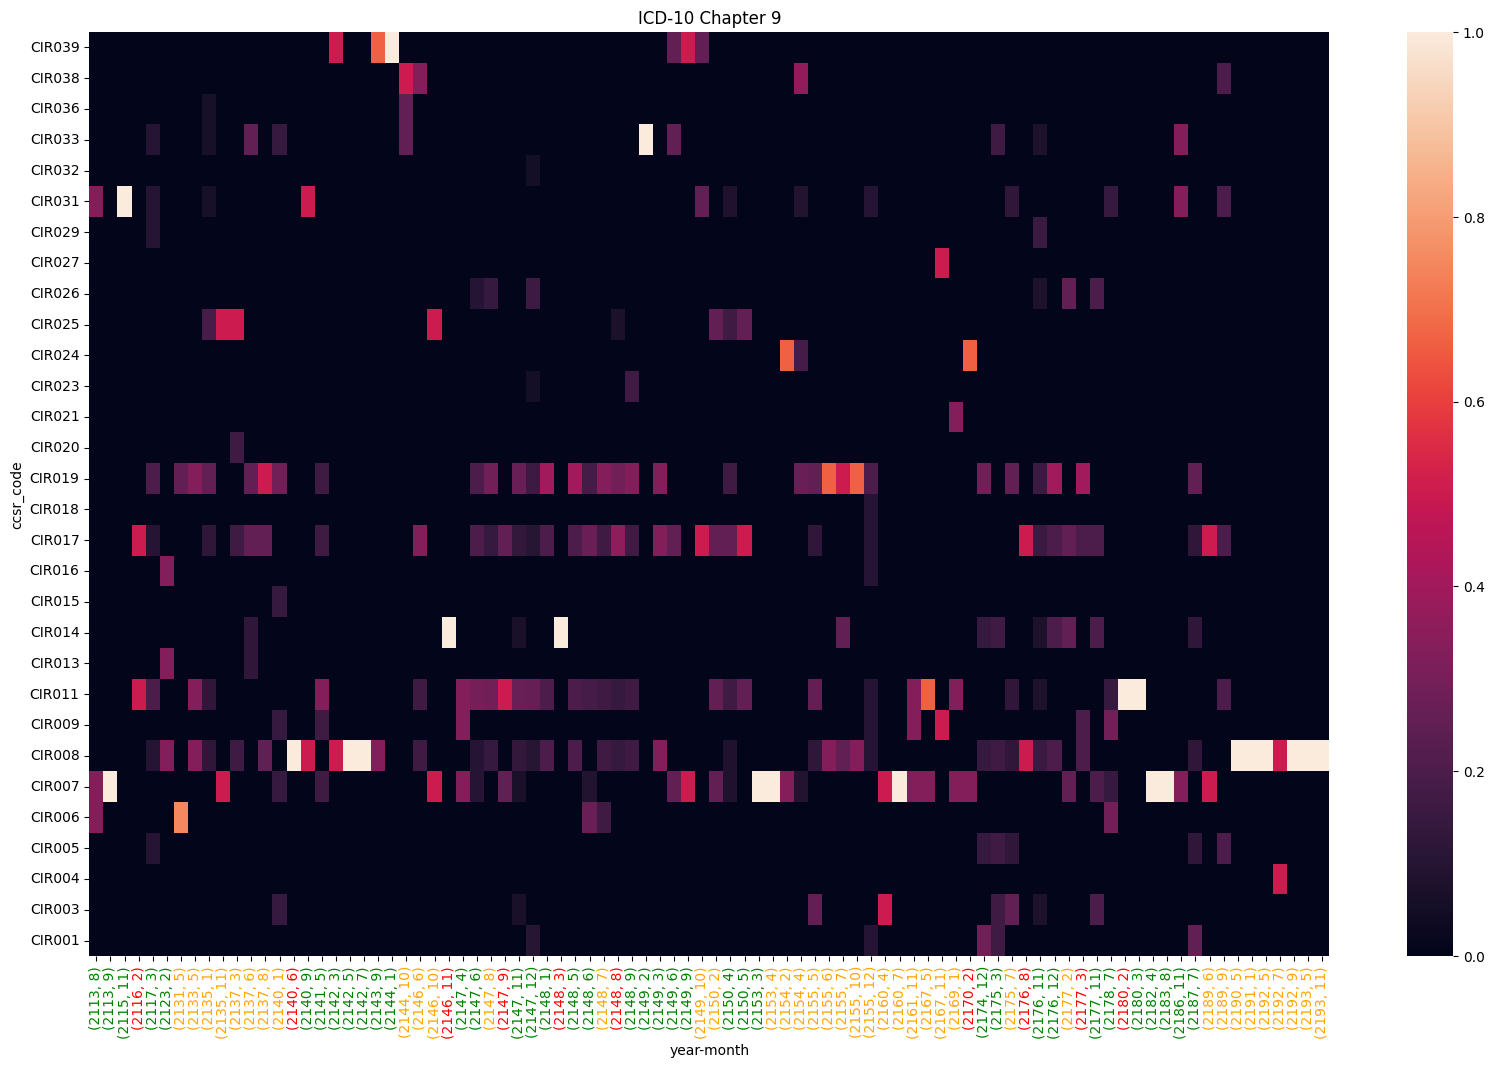

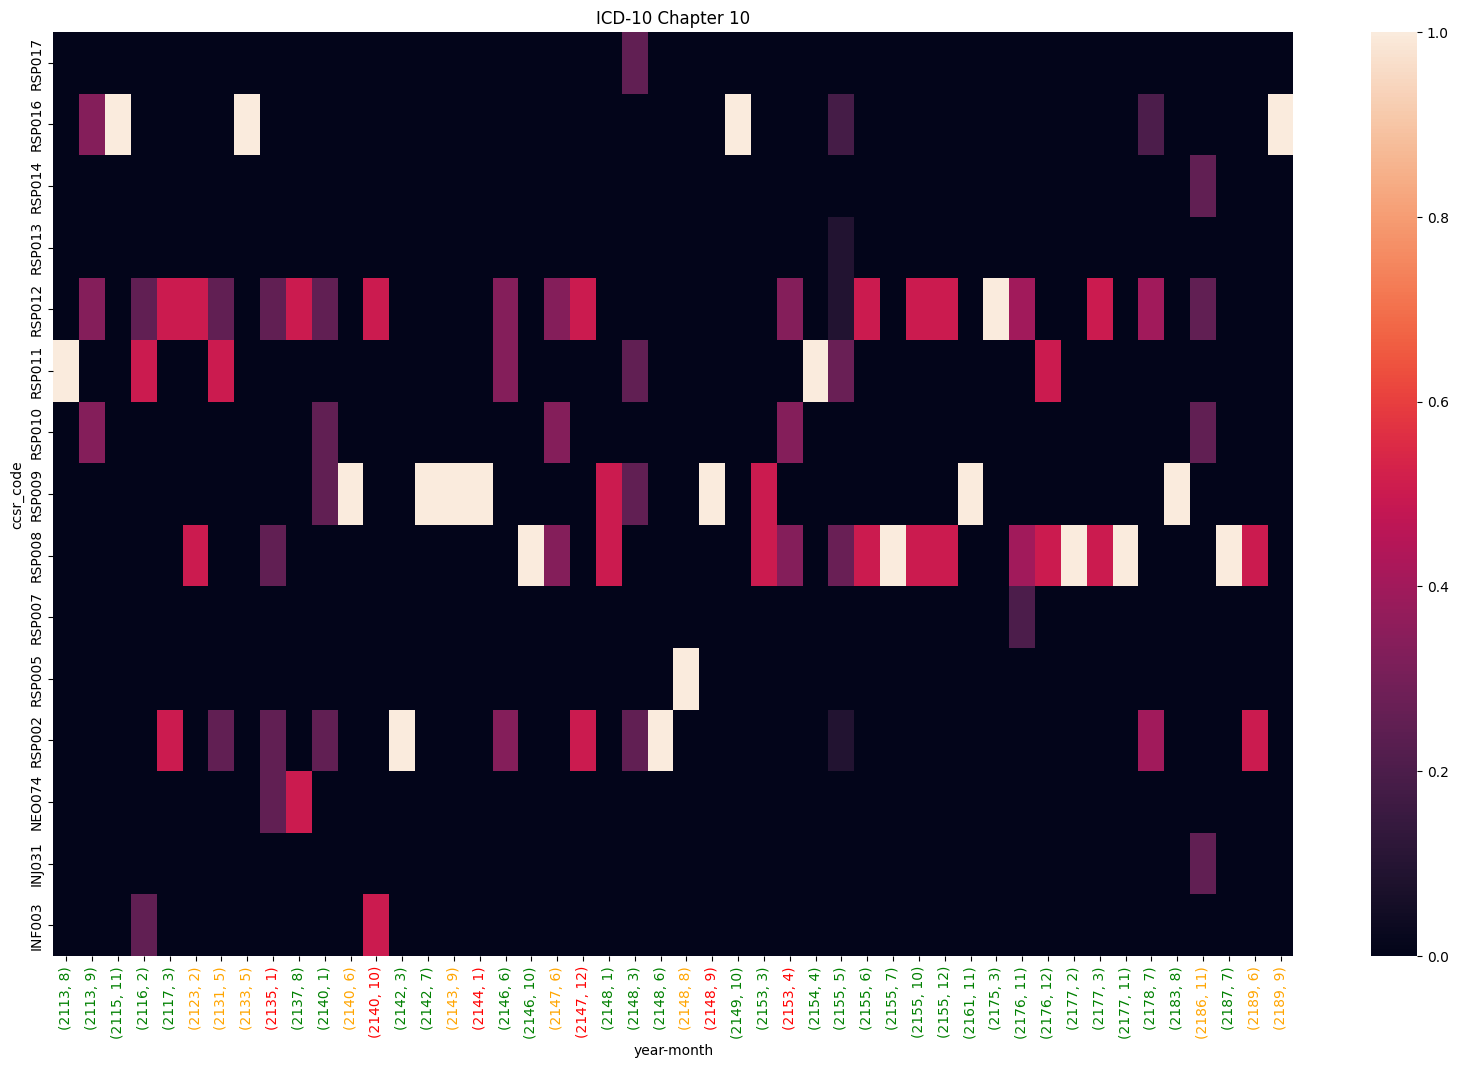

In [33]:
import numpy as np

from matplotlib.colors import ListedColormap

from src.change_detector.change_detector import PDFChangeDetector

for chapter, content in list(structured_df_dict.items())[:3]:
    
    rel_freq_table = content['ccsr_rel_freq'].drop('visit_start_date', axis=1)
    
    detector = PDFChangeDetector(a_memory=0.95)

    number_of_periods = rel_freq_table.shape[0]

    state_array = np.empty((number_of_periods,1), dtype='uint8')

    for i in range(number_of_periods):
        print(f"PDF number {i} - year {rel_freq_table.index[i]}:")
        result,_,_ = detector.detect_change(rel_freq_table.iloc[i])
        state_array[i][0] = result.value
        print(result.value, result.name)
        print("*****\n")
    # print(state_array)
    print(state_array.shape)
    
    plot_df = rel_freq_table.astype('float').T
    
    fig, ax = plt.subplots(figsize=(20,12))
   
    plt.title(f'ICD-10 Chapter {chapter}')
    cmap = ListedColormap(["green", "orange", "red"])
    
    g = sns.heatmap(plot_df.sort_index(ascending=False), xticklabels=rel_freq_table.index, ax=ax)

    for i, tick_label in enumerate(g.axes.get_xticklabels()):
        tick_label.set_color(cmap.colors[state_array[i][0]])
    


PDF number 0 - year (2113, 8):
0 IN_CONTROL
*****

PDF number 1 - year (2115, 11):
0 IN_CONTROL
*****

PDF number 2 - year (2116, 2):
0 IN_CONTROL
*****

PDF number 3 - year (2117, 3):
0 IN_CONTROL
*****

PDF number 4 - year (2123, 2):
1 WARNING
*****

PDF number 5 - year (2131, 5):
2 OUT_OF_CONTROL
*****

PDF number 6 - year (2133, 5):
0 IN_CONTROL
*****

PDF number 7 - year (2135, 1):
0 IN_CONTROL
*****

PDF number 8 - year (2137, 3):
2 OUT_OF_CONTROL
*****

PDF number 9 - year (2137, 8):
0 IN_CONTROL
*****

PDF number 10 - year (2140, 1):
0 IN_CONTROL
*****

PDF number 11 - year (2140, 6):
1 WARNING
*****

PDF number 12 - year (2140, 9):
2 OUT_OF_CONTROL
*****

PDF number 13 - year (2140, 10):
0 IN_CONTROL
*****

PDF number 14 - year (2141, 5):
0 IN_CONTROL
*****

PDF number 15 - year (2142, 3):
0 IN_CONTROL
*****

PDF number 16 - year (2142, 7):
0 IN_CONTROL
*****

PDF number 17 - year (2143, 9):
0 IN_CONTROL
*****

PDF number 18 - year (2144, 1):
0 IN_CONTROL
*****

PDF number 19 

/home/pedro/MECD/TESE/code/src/change_detector/stats_and_distance/stats_and_distance.py:21: RuntimeWarning: divide by zero encountered in log
  return np.exp((1/order)*np.log(new_value)+((order-1)/order)*np.log(previous_value))


PDF number 0 - year (2113, 8):
0 IN_CONTROL
*****

PDF number 1 - year (2113, 9):
0 IN_CONTROL
*****

PDF number 2 - year (2115, 11):
0 IN_CONTROL
*****

PDF number 3 - year (2116, 2):
0 IN_CONTROL
*****

PDF number 4 - year (2117, 3):
0 IN_CONTROL
*****

PDF number 5 - year (2123, 2):
1 WARNING
*****

PDF number 6 - year (2131, 5):
1 WARNING
*****

PDF number 7 - year (2133, 5):
1 WARNING
*****

PDF number 8 - year (2135, 1):
2 OUT_OF_CONTROL
*****

PDF number 9 - year (2137, 8):
0 IN_CONTROL
*****

PDF number 10 - year (2140, 1):
0 IN_CONTROL
*****

PDF number 11 - year (2140, 6):
1 WARNING
*****

PDF number 12 - year (2140, 10):
2 OUT_OF_CONTROL
*****

PDF number 13 - year (2142, 3):
0 IN_CONTROL
*****

PDF number 14 - year (2142, 7):
0 IN_CONTROL
*****

PDF number 15 - year (2143, 9):
1 WARNING
*****

PDF number 16 - year (2144, 1):
2 OUT_OF_CONTROL
*****

PDF number 17 - year (2146, 6):
0 IN_CONTROL
*****

PDF number 18 - year (2146, 10):
0 IN_CONTROL
*****

PDF number 19 - year (

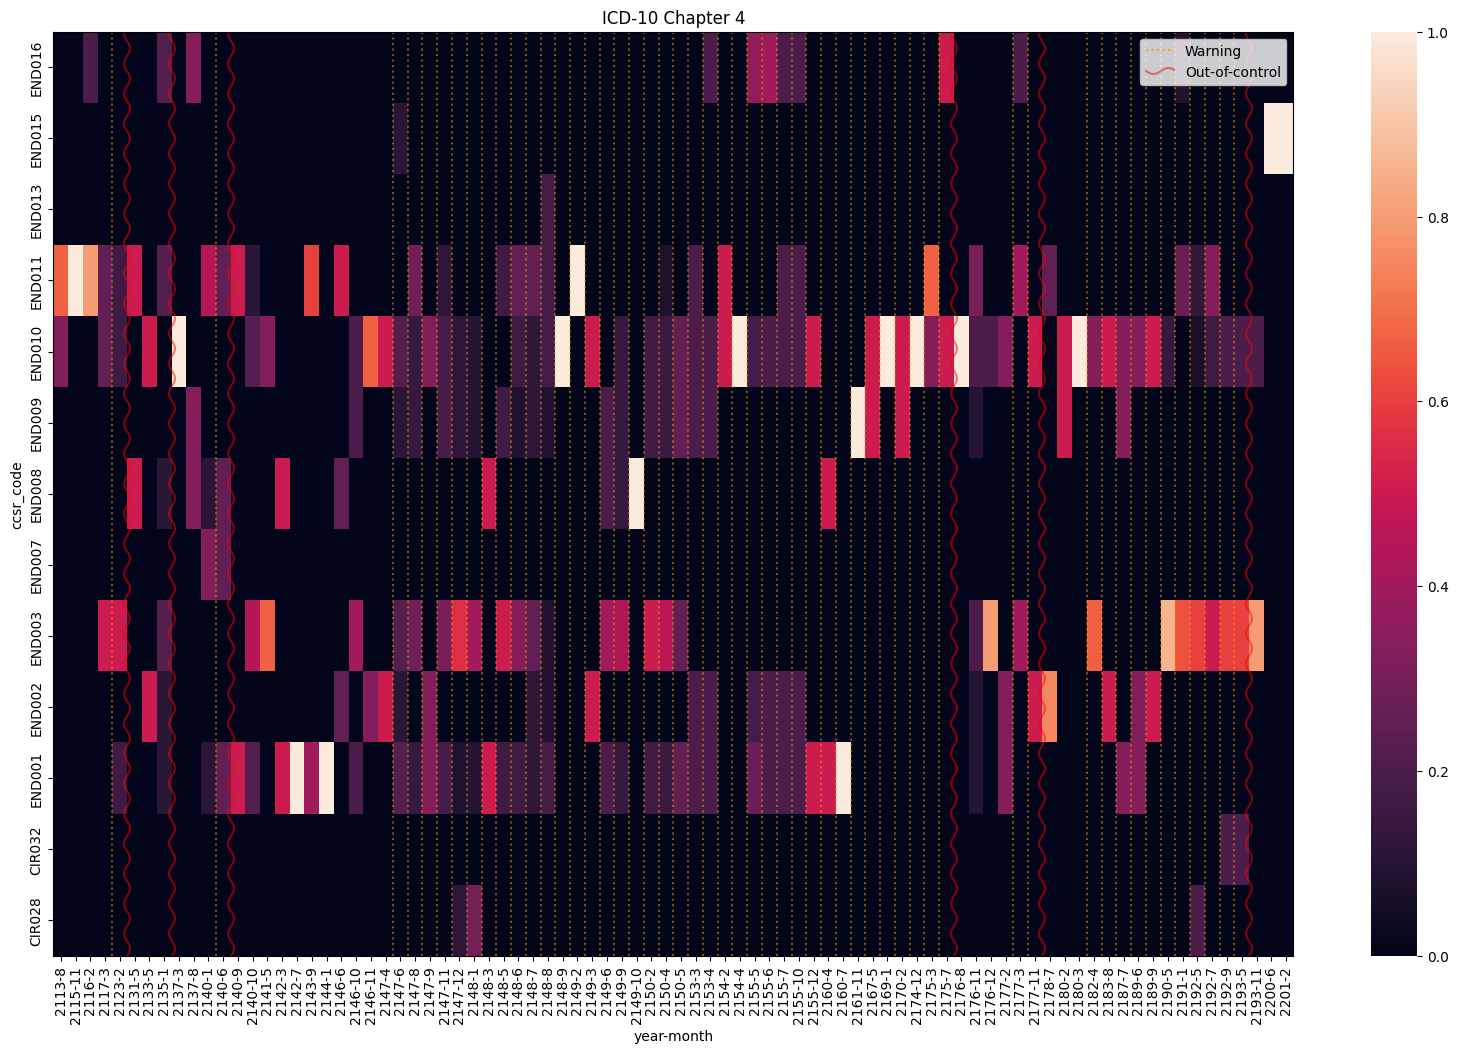

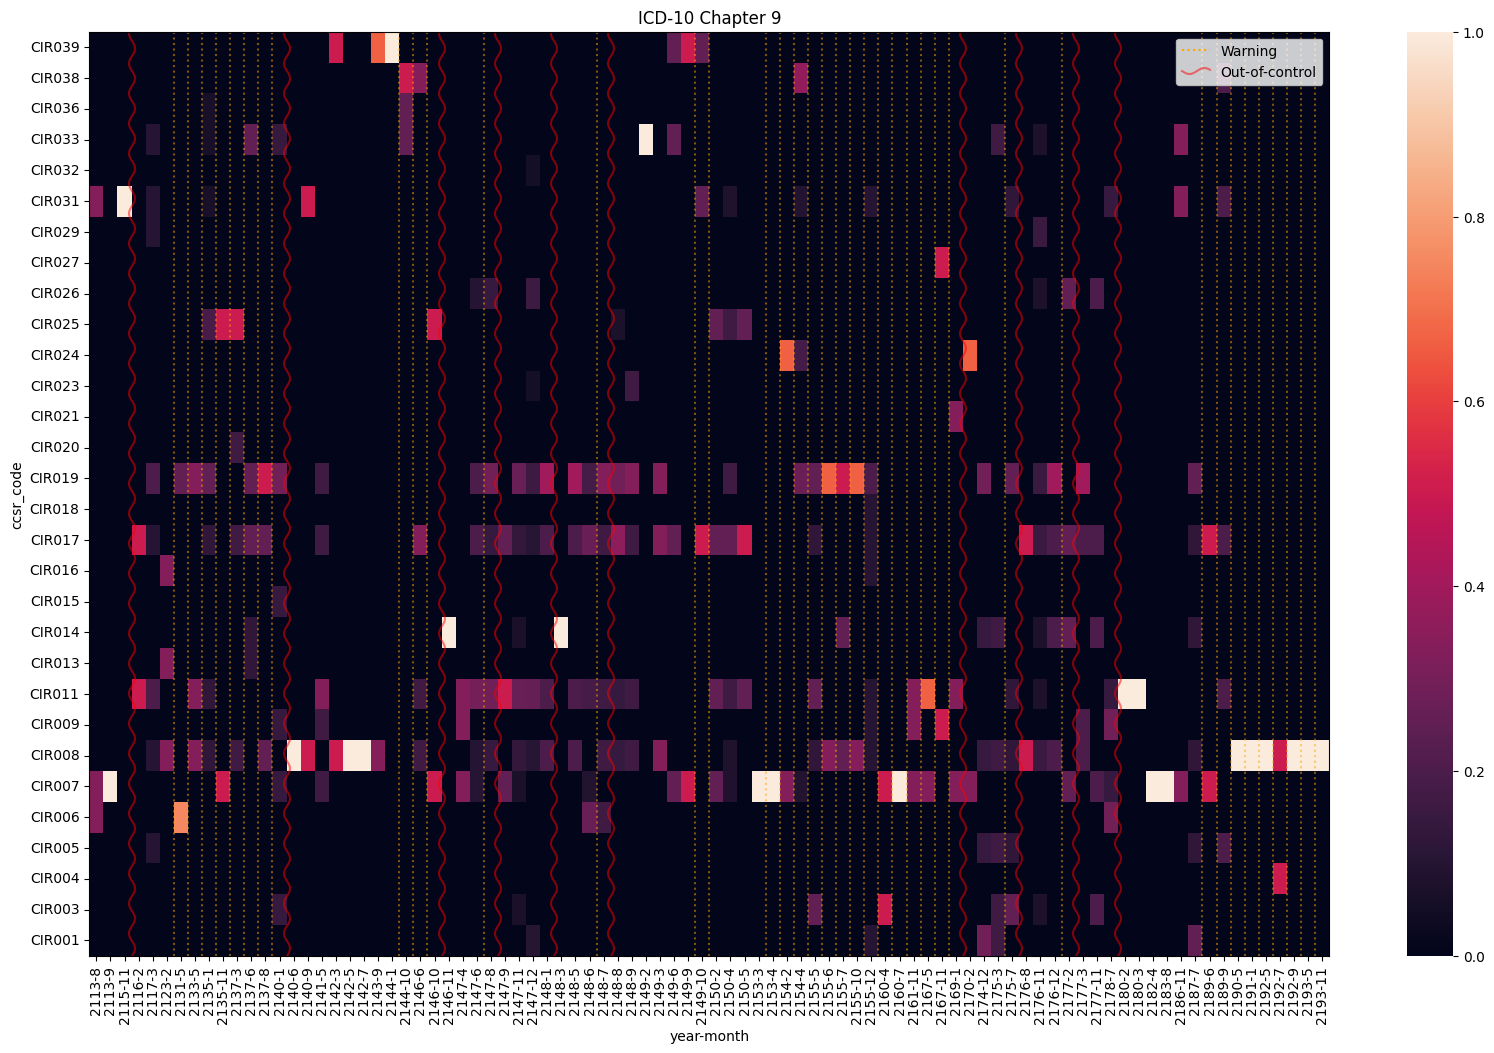

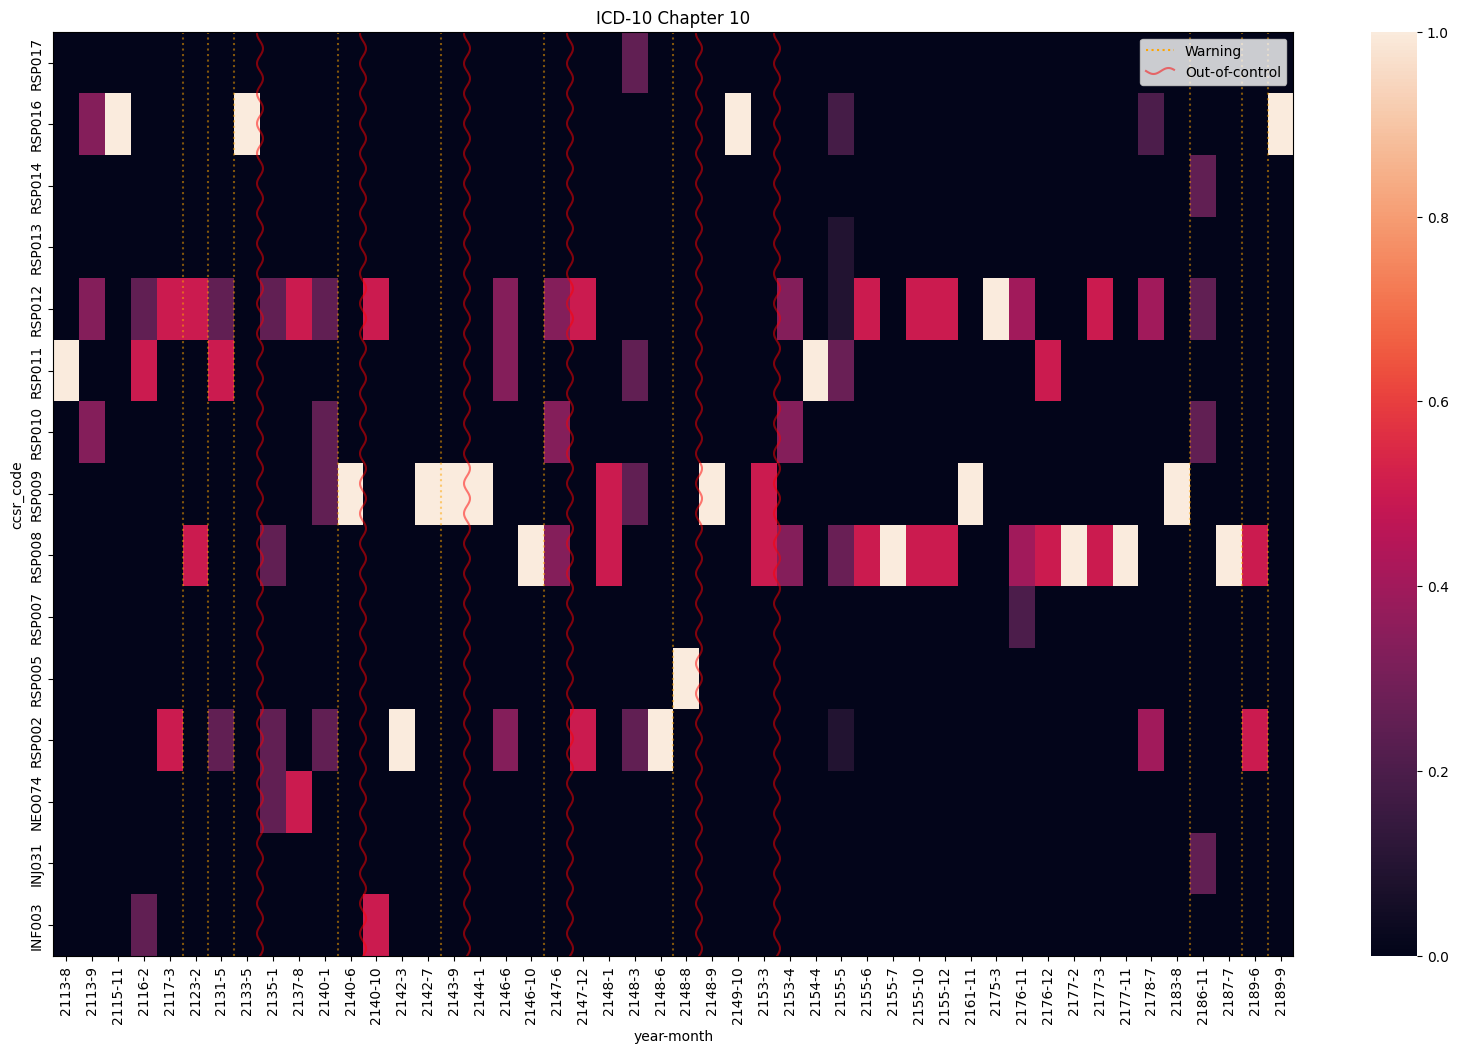

In [34]:
#trying with a vertical line indicator

import numpy as np

import matplotlib as mpl
from matplotlib.colors import ListedColormap

from src.change_detector.change_detector import PDFChangeDetector

for chapter, content in list(structured_df_dict.items())[:3]:
    
    rel_freq_table = content['ccsr_rel_freq'].drop('visit_start_date', axis=1)
    
    detector = PDFChangeDetector(a_memory=0.95)

    number_of_periods = rel_freq_table.shape[0]

    state_array = np.empty((number_of_periods,1), dtype='uint8')

    for i in range(number_of_periods):
        print(f"PDF number {i} - year {rel_freq_table.index[i]}:")
        result,_,_ = detector.detect_change(rel_freq_table.iloc[i])
        state_array[i][0] = result.value
        print(result.value, result.name)
        print("*****\n")
    # print(state_array)
    print(state_array.shape)
    
    plot_df = rel_freq_table.astype('float').T
    
    fig, ax = plt.subplots(figsize=(20,12))
    
    plt.title(f'ICD-10 Chapter {chapter}')
    
    g = sns.heatmap(plot_df.sort_index(ascending=False))#, xticklabels=rel_freq_table.index, ax=ax)

    ax2 = g.twiny()
    ax2.set_xlim(g.axes.get_xlim())
    ax2.get_xaxis().set_visible(False)
    ax2.grid(False)
    for i in range(number_of_periods):
        # if state_array[i][0] == 0:
        #     ax2.axvline(i, color='green')
        if state_array[i][0] == 1:
            ax2.axvline(i, color='orange', linestyle='dotted', alpha=0.5, label="Warning")
        elif state_array[i][0] == 2:
            with mpl.rc_context({'path.sketch':(3,30,1)}):
                ax2.axvline(i, color='red', alpha=0.5, label="Out-of-control") # linestyle='solid',
    
    warning_line=mpl.lines.Line2D([], [], color='orange', linestyle='dotted')
    with mpl.rc_context({'path.sketch':(3,30,1)}):
        out_of_control_line=mpl.lines.Line2D([], [], color='red', alpha=0.5)
    
    ax2.legend([warning_line, out_of_control_line], ['Warning', 'Out-of-control'], loc="upper right")

In [35]:
 (rel_freq_table.index.to_flat_index().to_list())

[(2113, 8),
 (2113, 9),
 (2115, 11),
 (2116, 2),
 (2117, 3),
 (2123, 2),
 (2131, 5),
 (2133, 5),
 (2135, 1),
 (2137, 8),
 (2140, 1),
 (2140, 6),
 (2140, 10),
 (2142, 3),
 (2142, 7),
 (2143, 9),
 (2144, 1),
 (2146, 6),
 (2146, 10),
 (2147, 6),
 (2147, 12),
 (2148, 1),
 (2148, 3),
 (2148, 6),
 (2148, 8),
 (2148, 9),
 (2149, 10),
 (2153, 3),
 (2153, 4),
 (2154, 4),
 (2155, 5),
 (2155, 6),
 (2155, 7),
 (2155, 10),
 (2155, 12),
 (2161, 11),
 (2175, 3),
 (2176, 11),
 (2176, 12),
 (2177, 2),
 (2177, 3),
 (2177, 11),
 (2178, 7),
 (2183, 8),
 (2186, 11),
 (2187, 7),
 (2189, 6),
 (2189, 9)]

In [36]:
ICD10_chapters_mapping= {
    '1':'Certain infectious and parasitic diseases',
    '2':'Neoplasms',
    '3':'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism',
    '4':'Endocrine, nutritional and metabolic diseases',
    '5':'Mental and behavioural disorders',
    '6':'Diseases of the nervous system',
    '7':'Diseases of the eye and adnexa',
    '8':'Diseases of the ear and mastoid process',
    '9':'Diseases of the circulatory system',
    '10':'Diseases of the respiratory system',
    '11':'Diseases of the digestive system',
    '12':'Diseases of the skin and subcutaneous tissue',
    '13':'Diseases of the musculoskeletal system and connective tissue',
    '14':'Diseases of the genitourinary system',
    '15':'Pregnancy, childbirth and the puerperium',
    '16':'Certain conditions originating in the perinatal period',
    '17':'Congenital malformations, deformations and chromosomal abnormalities',
    '18':'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified',
    '19':'Injury, poisoning and certain other consequences of external causes',
    '20':'External causes of morbidity and mortality',
    '21':'Factors influencing health status and contact with health services',
    '22':'Codes for special purposes'
}

In [ ]:
with open('data/mappings/icd10_chapter_description.json', 'w') as fp:
    json.dump(ICD10_chapters_mapping,fp)

In [ ]:
with open('data/mappings/icd10_chapter_description.json', 'r') as fp:
    ICD10_chapters_mapping = json.load(fp)

In [ ]:
ICD10_chapters_mapping

{'1': 'Certain infectious and parasitic diseases',
 '2': 'Neoplasms',
 '3': 'Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism',
 '4': 'Endocrine, nutritional and metabolic diseases',
 '5': 'Mental and behavioural disorders',
 '6': 'Diseases of the nervous system',
 '7': 'Diseases of the eye and adnexa',
 '8': 'Diseases of the ear and mastoid process',
 '9': 'Diseases of the circulatory system',
 '10': 'Diseases of the respiratory system',
 '11': 'Diseases of the digestive system',
 '12': 'Diseases of the skin and subcutaneous tissue',
 '13': 'Diseases of the musculoskeletal system and connective tissue',
 '14': 'Diseases of the genitourinary system',
 '15': 'Pregnancy, childbirth and the puerperium',
 '16': 'Certain conditions originating in the perinatal period',
 '17': 'Congenital malformations, deformations and chromosomal abnormalities',
 '18': 'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified

In [ ]:
with open('data/mappings/icd10_codes.json', 'r') as fp:
    ICD_diagnoses_mapping = json.load(fp)
    
icd10_code_descriptors_dict = {x['code']: x['desc'] for x in ICD_diagnoses_mapping}

In [ ]:
icd10_code_descriptors_dict

{'A000': 'Cholera due to Vibrio cholerae 01, biovar cholerae',
 'A001': 'Cholera due to Vibrio cholerae 01, biovar eltor',
 'A009': 'Cholera, unspecified',
 'A0100': 'Typhoid fever, unspecified',
 'A0101': 'Typhoid meningitis',
 'A0102': 'Typhoid fever with heart involvement',
 'A0103': 'Typhoid pneumonia',
 'A0104': 'Typhoid arthritis',
 'A0105': 'Typhoid osteomyelitis',
 'A0109': 'Typhoid fever with other complications',
 'A011': 'Paratyphoid fever A',
 'A012': 'Paratyphoid fever B',
 'A013': 'Paratyphoid fever C',
 'A014': 'Paratyphoid fever, unspecified',
 'A020': 'Salmonella enteritis',
 'A021': 'Salmonella sepsis',
 'A0220': 'Localized salmonella infection, unspecified',
 'A0221': 'Salmonella meningitis',
 'A0222': 'Salmonella pneumonia',
 'A0223': 'Salmonella arthritis',
 'A0224': 'Salmonella osteomyelitis',
 'A0225': 'Salmonella pyelonephritis',
 'A0229': 'Salmonella with other localized infection',
 'A028': 'Other specified salmonella infections',
 'A029': 'Salmonella infectio

In [ ]:
icd9_code_descriptors_dict = {x['icd9code']: x['long_description'] for x in pd.read_csv('data/mappings/icd9-descriptions.csv', encoding='latin-1').to_dict(orient='records')}
icd9_code_descriptors_dict

{'001.0': 'Cholera due to vibrio cholerae',
 '001.1': 'Cholera due to vibrio cholerae el tor',
 '001.9': 'Cholera - unspecified',
 '002.0': 'Typhoid fever',
 '002.1': 'Paratyphoid fever A',
 '002.2': 'Paratyphoid fever B',
 '002.3': 'Paratyphoid fever C',
 '002.9': 'Paratyphoid fever - unspecified',
 '003.0': 'Salmonella gastroenteritis',
 '003.1': 'Salmonella septicemia',
 '003.20': 'Localized salmonella infection - unspecified',
 '003.21': 'Salmonella meningitis',
 '003.22': 'Salmonella pneumonia',
 '003.23': 'Salmonella arthritis',
 '003.24': 'Salmonella osteomyelitis',
 '003.29': 'Other localized salmonella infections',
 '003.8': 'Other specified salmonella infections',
 '003.9': 'Salmonella infection - unspecified',
 '004.0': 'Shigella dysenteriae',
 '004.1': 'Shigella flexneri',
 '004.2': 'Shigella boydii',
 '004.3': 'Shigella sonnei',
 '004.8': 'Other specified shigella infections',
 '004.9': 'Shigellosis - unspecified',
 '005.0': 'Staphylococcal food poisoning',
 '005.1': 'Botu

In [ ]:
with open('data/mappings/icd9_code_descriptions.json', 'w') as fp:
    json.dump(icd9_code_descriptors_dict,fp)

In [ ]:
with open('data/mappings/icd10_code_descriptions.json', 'w') as fp:
    json.dump(icd10_code_descriptors_dict,fp)

Drug features

In [37]:
omop_db.clinical_tables.drug_exposure.drug_source_value.value_counts()

drug_source_value
Sodium Chloride 0.9%  Flush 10 mL Syringe    459
00338004904                                  397
00409672924                                  362
00002751001                                  307
63323026201                                  295
                                            ... 
59148007091                                    1
00904628061                                    1
74300000539                                    1
00407141229                                    1
51079034820                                    1
Name: count, Length: 1345, dtype: Int64

In [38]:
omop_db.clinical_tables.drug_exposure.drug_concept_id.value_counts()

drug_concept_id
46275280    794
40221385    644
0           546
19127213    462
40220357    397
           ... 
1383869       1
793244        1
19082373      1
19041171      1
46234346      1
Name: count, Length: 897, dtype: Int64

In [ ]:
omop_db.clinical_tables.person

,person_id,gender_concept_id,year_of_birth,month_of_birth,day_of_birth,birth_datetime,race_concept_id,ethnicity_concept_id,location_id,provider_id,care_site_id,person_source_value,gender_source_value,gender_source_concept_id,race_source_value,race_source_concept_id,ethnicity_source_value,ethnicity_source_concept_id
0,3589912774911670296,8507,2095,<NA>,<NA>,<NA>,0,38003563,<NA>,<NA>,<NA>,10009628,M,0,<NA>,0,HISPANIC/LATINO,2000001408
1,-3210373572193940939,8507,2079,<NA>,<NA>,<NA>,0,38003563,<NA>,<NA>,<NA>,10011398,M,0,<NA>,0,HISPANIC/LATINO,2000001408
2,-775517641933593374,8507,2149,<NA>,<NA>,<NA>,8516,0,<NA>,<NA>,<NA>,10004235,M,0,BLACK/AFRICAN AMERICAN,2000001406,<NA>,0
3,-2575767131279873665,8507,2050,<NA>,<NA>,<NA>,8516,0,<NA>,<NA>,<NA>,10024043,M,0,BLACK/AFRICAN AMERICAN,2000001406,<NA>,0
4,-8970844422700220177,8507,2114,<NA>,<NA>,<NA>,8527,0,<NA>,<NA>,<NA>,10038933,M,0,WHITE,2000001404,<NA>,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-7671795861352464589,8532,2052,<NA>,<NA>,<NA>,2000001401,0,<NA>,<NA>,<NA>,10038081,F,0,UNKNOWN,2000001401,<NA>,0
96,5734523979606454056,8532,2069,<NA>,<NA>,<NA>,2000001401,0,<NA>,<NA>,<NA>,10036156,F,0,UNKNOWN,2000001401,<NA>,0
97,1532249960797525190,8532,2106,<NA>,<NA>,<NA>,2000001405,0,<NA>,<NA>,<NA>,10014078,F,0,UNABLE TO OBTAIN,2000001405,<NA>,0
98,5894416985828315484,8532,2055,<NA>,<NA>,<NA>,2000001405,0,<NA>,<NA>,<NA>,10019172,F,0,UNABLE TO OBTAIN,2000001405,<NA>,0


In [ ]:
# Check ATC codes mappings from source values

In [ ]:
bool('')

False

In [ ]:
ccsr_descriptions = pd.read_csv('./data/mappings/ccsr/DXCCSR_v2024-1.csv', encoding='latin-1')[["'CCSR CATEGORY 1'","'CCSR CATEGORY 1 DESCRIPTION'"]]

/tmp/ipykernel_15431/1739276771.py:1: DtypeWarning: Columns (15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  ccsr_descriptions = pd.read_csv('./data/mappings/ccsr/DXCCSR_v2024-1.csv', encoding='latin-1')[["'CCSR CATEGORY 1'","'CCSR CATEGORY 1 DESCRIPTION'"]]


In [ ]:
ccsr_descriptions

,'CCSR CATEGORY 1','CCSR CATEGORY 1 DESCRIPTION'
0,'DIG001',Intestinal infection
1,'DIG001',Intestinal infection
2,'DIG001',Intestinal infection
3,'DIG001',Intestinal infection
4,'INF003',Bacterial infections
...,...,...
74981,'FAC012',Other specified encounters and counseling
74982,'FAC025',Other specified status
74983,'FAC025',Other specified status
74984,'FAC025',Other specified status


In [ ]:
ccsr_descriptions['CCSR CATEGORY 1'] = ccsr_descriptions['\'CCSR CATEGORY 1\''].apply(lambda x: x.strip('\''))
ccsr_descriptions.drop(['\'CCSR CATEGORY 1\''], axis=1, inplace=True)
ccsr_descriptions.rename(columns={'\'CCSR CATEGORY 1 DESCRIPTION\'': 'CCSR CATEGORY 1 DESCRIPTION'}, inplace=True)
ccsr_descriptions

,CCSR CATEGORY 1 DESCRIPTION,CCSR CATEGORY 1
0,Intestinal infection,DIG001
1,Intestinal infection,DIG001
2,Intestinal infection,DIG001
3,Intestinal infection,DIG001
4,Bacterial infections,INF003
...,...,...
74981,Other specified encounters and counseling,FAC012
74982,Other specified status,FAC025
74983,Other specified status,FAC025
74984,Other specified status,FAC025


In [ ]:
ccsr_descriptions.drop_duplicates(inplace=True)

In [ ]:
ccsr_descriptions.set_index('CCSR CATEGORY 1', inplace=True)

In [ ]:
ccsr_descriptions_dict = {key: item['CCSR CATEGORY 1 DESCRIPTION'] for key, item in ccsr_descriptions.to_dict(orient='index').items()}

In [ ]:
ccsr_descriptions_dict

{'DIG001': 'Intestinal infection',
 'INF003': 'Bacterial infections',
 'INF002': 'Septicemia',
 'GEN004': 'Urinary tract infections',
 'INF005': 'Foodborne intoxications',
 'INF009': 'Parasitic, other specified and unspecified infections',
 'INF001': 'Tuberculosis',
 'GEN006': 'Other specified and unspecified diseases of kidney and ureters',
 'GEN007': 'Other specified and unspecified diseases of bladder and urethra',
 'GEN013': 'Inflammatory conditions of male genital organs',
 'GEN018': 'Inflammatory diseases of female pelvic organs',
 'DIG016': 'Peritonitis and intra-abdominal abscess',
 'EYE012': 'Other specified eye disorders',
 'EYE001': 'Cornea and external disease',
 'EYE005': 'Retinal and vitreous conditions',
 'EAR002': 'Diseases of middle ear and mastoid (except otitis media)',
 'END015': 'Other specified and unspecified endocrine disorders',
 'END001': 'Thyroid disorders',
 'DIG025': 'Other specified and unspecified gastrointestinal disorders',
 'CIR004': 'Endocarditis and 

In [ ]:
with open('./data/mappings/ccsr_descriptions.json', 'w') as fp:
    json.dump(ccsr_descriptions_dict, fp)

CCS description mappings

In [10]:
import json
import pandas as pd

In [5]:
ccs_descriptions = pd.read_csv('./data/mappings/ccs/ccs_dx_label 2015.csv', encoding='latin-1')
ccs_descriptions.drop_duplicates(inplace=True)
ccs_descriptions

,CCS DIAGNOSIS CATEGORIES,CCS DIAGNOSIS CATEGORIES LABELS
0,.Z,Overall
1,.,No diagnosis
2,.A,Invalid diagnosis
3,1,Tuberculosis
4,2,Septicemia (except in labor)
...,...,...
283,2617,E Codes: Adverse effects of medical drugs
284,2618,E Codes: Other specified and classifiable
285,2619,E Codes: Other specified; NEC
286,2620,E Codes: Unspecified


In [7]:
ccs_descriptions_dict = {key: item['CCS DIAGNOSIS CATEGORIES LABELS'] for key, item in ccs_descriptions.to_dict(orient='index').items()}

In [8]:
ccs_descriptions_dict

{0: 'Overall',
 1: 'No diagnosis',
 2: 'Invalid diagnosis',
 3: 'Tuberculosis',
 4: 'Septicemia (except in labor)',
 5: 'Bacterial infection; unspecified site',
 6: 'Mycoses',
 7: 'HIV infection',
 8: 'Hepatitis',
 9: 'Viral infection',
 10: 'Other infections; including parasitic',
 11: 'Sexually transmitted infections (not HIV or hepatitis)',
 12: 'Immunizations and screening for infectious disease',
 13: 'Cancer of head and neck',
 14: 'Cancer of esophagus',
 15: 'Cancer of stomach',
 16: 'Cancer of colon',
 17: 'Cancer of rectum and anus',
 18: 'Cancer of liver and intrahepatic bile duct',
 19: 'Cancer of pancreas',
 20: 'Cancer of other GI organs; peritoneum',
 21: 'Cancer of bronchus; lung',
 22: 'Cancer; other respiratory and intrathoracic',
 23: 'Cancer of bone and connective tissue',
 24: 'Melanomas of skin',
 25: 'Other non-epithelial cancer of skin',
 26: 'Cancer of breast',
 27: 'Cancer of uterus',
 28: 'Cancer of cervix',
 29: 'Cancer of ovary',
 30: 'Cancer of other female

In [11]:
with open('./data/mappings/ccs_descriptions.json', 'w') as fp:
    json.dump(ccs_descriptions_dict, fp)

Explore drug prescriptions

In [2]:
import json
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from src.inout.load_omop import OMOP_data


In [3]:

csv_folder_path = './data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv'

with open('./data/OMOP_structure_and_types/OMOPCDM_5.3_structure.json', 'r') as f:
    tables_structure = json.load(f)
    
omop_db = OMOP_data(csv_data_path=csv_folder_path, tables_structure=tables_structure)

Ingesting clinical_tables:
Ingesting table person.
Ingesting file ./data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv/person.csv was successful.
Ingesting table observation_period.
Ingesting file ./data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv/observation_period.csv was successful.
Ingesting table death.
Ingesting file ./data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv/death.csv was successful.
Ingesting table visit_occurrence.
Ingesting file ./data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv/visit_occurrence.csv was successful.
Ingesting table visit_detail.
Ingesting file ./data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv/visit_detail.csv was successful.
Ingesting table condition_occurrence.
Ingesting file ./data/mimic-iv-demo-data-in-the-omop-common-data-model-0.9/1_omop_data_csv/condition_occurrence.csv was successful.
Ingesting table drug_exposure.
Ingestin

In [4]:
omop_db.clinical_tables.drug_exposure

,drug_exposure_id,person_id,drug_concept_id,drug_exposure_start_date,drug_exposure_start_datetime,drug_exposure_end_date,drug_exposure_end_datetime,verbatim_end_date,drug_type_concept_id,stop_reason,...,sig,route_concept_id,lot_number,provider_id,visit_occurrence_id,visit_detail_id,drug_source_value,drug_source_concept_id,route_source_value,dose_unit_source_value
0,294884377115777655,1741351032930224901,40166274,2177-07-16,2177-07-16 22:00:00,2177-07-17,2177-07-17 21:00:00,<NA>,32838,<NA>,...,NaN,4142048,<NA>,<NA>,3736965967695233281,<NA>,00002751001,45144375,SC,VIAL
1,-3609243742606366340,1741351032930224901,40166274,2177-07-17,2177-07-17 19:00:00,2177-07-18,2177-07-18 18:00:00,<NA>,32838,<NA>,...,NaN,4142048,<NA>,<NA>,3736965967695233281,<NA>,00002751001,45144375,SC,VIAL
2,-6865345241721388581,1741351032930224901,40166274,2177-07-15,2177-07-15 19:00:00,2177-07-16,2177-07-16 18:00:00,<NA>,32838,<NA>,...,NaN,4142048,<NA>,<NA>,3736965967695233281,<NA>,00002751001,45144375,SC,VIAL
3,-826223020394544622,1741351032930224901,40166274,2177-07-21,2177-07-21 22:00:00,2177-07-22,2177-07-22 21:00:00,<NA>,32838,<NA>,...,NaN,4142048,<NA>,<NA>,3736965967695233281,<NA>,00002751001,45144375,SC,VIAL
4,2417954811860157314,1741351032930224901,40166274,2177-07-18,2177-07-18 23:00:00,2177-07-19,2177-07-19 22:00:00,<NA>,32838,<NA>,...,NaN,4142048,<NA>,<NA>,3736965967695233281,<NA>,00002751001,45144375,SC,VIAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18224,-5144476626986792845,3192038106523208432,36249735,2136-08-05,2136-08-05 01:00:00,2136-08-05,2136-08-05 09:00:00,<NA>,32838,<NA>,...,NaN,4171047,<NA>,<NA>,-896999919681882625,<NA>,Iso-Osmotic Dextrose 200ml Bag,2000011380,IV,mL
18225,2583812317283757784,3192038106523208432,36249735,2136-08-08,2136-08-08 20:00:00,2136-08-11,2136-08-11 23:00:00,<NA>,32838,<NA>,...,NaN,4171047,<NA>,<NA>,-896999919681882625,<NA>,Iso-Osmotic Dextrose 200ml Bag,2000011380,IV,mL
18226,5344866293695870763,3192038106523208432,19127213,2136-08-05,2136-08-05 01:00:00,2136-08-11,2136-08-11 23:00:00,<NA>,32838,<NA>,...,NaN,4171047,<NA>,<NA>,-896999919681882625,<NA>,Sodium Chloride 0.9% Flush 10 mL Syringe,2000011396,IV,SYR
18227,-8090179442343534710,3192038106523208432,19127213,2136-08-09,2136-08-09 09:00:00,2136-08-11,2136-08-11 23:00:00,<NA>,32838,<NA>,...,NaN,4171047,<NA>,<NA>,-896999919681882625,<NA>,Sodium Chloride 0.9% Flush 10 mL Syringe,2000011396,IV,SYR


In [5]:
omop_db.clinical_tables.drug_exposure.drug_source_value.value_counts()

drug_source_value
Sodium Chloride 0.9%  Flush 10 mL Syringe    459
00338004904                                  397
00409672924                                  362
00002751001                                  307
63323026201                                  295
                                            ... 
59148007091                                    1
00904628061                                    1
74300000539                                    1
00407141229                                    1
51079034820                                    1
Name: count, Length: 1345, dtype: Int64

In [6]:
omop_db.clinical_tables.drug_exposure.drug_concept_id.value_counts()

drug_concept_id
46275280    794
40221385    644
0           546
19127213    462
40220357    397
           ... 
1383869       1
793244        1
19082373      1
19041171      1
46234346      1
Name: count, Length: 897, dtype: Int64

In [7]:
visit_condition_df = omop_db.clinical_tables.condition_occurrence[['condition_source_value','visit_occurrence_id']]\
    .join(
        omop_db.clinical_tables.visit_occurrence[['visit_occurrence_id','visit_start_date']]\
    .set_index('visit_occurrence_id'),
        on='visit_occurrence_id',
        rsuffix='_visit'
        )

In [8]:
visit_prescription_df = omop_db.clinical_tables.drug_exposure[['drug_source_value','visit_occurrence_id']]\
    .join(
        omop_db.clinical_tables.visit_occurrence[['visit_occurrence_id','visit_start_date']]\
    .set_index('visit_occurrence_id'),
        on='visit_occurrence_id',
        rsuffix='_visit'
        )

In [9]:
visit_prescription_df

,drug_source_value,visit_occurrence_id,visit_start_date
0,00002751001,3736965967695233281,2177-07-14
1,00002751001,3736965967695233281,2177-07-14
2,00002751001,3736965967695233281,2177-07-14
3,00002751001,3736965967695233281,2177-07-14
4,00002751001,3736965967695233281,2177-07-14
...,...,...,...
18224,Iso-Osmotic Dextrose 200ml Bag,-896999919681882625,2136-08-04
18225,Iso-Osmotic Dextrose 200ml Bag,-896999919681882625,2136-08-04
18226,Sodium Chloride 0.9% Flush 10 mL Syringe,-896999919681882625,2136-08-04
18227,Sodium Chloride 0.9% Flush 10 mL Syringe,-896999919681882625,2136-08-04


In [10]:
visit_prescription_df.drug_source_value.value_counts()

drug_source_value
Sodium Chloride 0.9%  Flush 10 mL Syringe    459
00338004904                                  397
00409672924                                  362
00002751001                                  307
63323026201                                  295
                                            ... 
59148007091                                    1
00904628061                                    1
74300000539                                    1
00407141229                                    1
51079034820                                    1
Name: count, Length: 1345, dtype: Int64

In [11]:
# Load ATC descriptions from csv file

ATC_descriptions = pd.read_csv('./data/mappings/ATC/ATC.csv', encoding='latin-1')

In [12]:
ATC_descriptions = ATC_descriptions[ATC_descriptions['Parents'].notnull()]
ATC_descriptions

,Class ID,Preferred Label,Synonyms,Definitions,Obsolete,CUI,Semantic Types,Parents,ATC LEVEL,Is Drug Class,Semantic type UMLS property
0,http://purl.bioontology.org/ontology/ATC/D11AX06,mequinol,NaN,NaN,False,C0048318,http://purl.bioontology.org/ontology/STY/T121|...,http://purl.bioontology.org/ontology/ATC/D11AX,5.0,NaN,http://purl.bioontology.org/ontology/STY/T121|...
1,http://purl.bioontology.org/ontology/ATC/J05AC02,rimantadine,NaN,NaN,False,C0035629,http://purl.bioontology.org/ontology/STY/T121|...,http://purl.bioontology.org/ontology/ATC/J05AC,5.0,NaN,http://purl.bioontology.org/ontology/STY/T121|...
2,http://purl.bioontology.org/ontology/ATC/R02AB01,neomycin,NaN,NaN,False,C0027603,http://purl.bioontology.org/ontology/STY/T195|...,http://purl.bioontology.org/ontology/ATC/R02AB,5.0,NaN,http://purl.bioontology.org/ontology/STY/T195|...
3,http://purl.bioontology.org/ontology/ATC/D10AX02,resorcinol,NaN,NaN,False,C0073085,http://purl.bioontology.org/ontology/STY/T121|...,http://purl.bioontology.org/ontology/ATC/D10AX,5.0,NaN,http://purl.bioontology.org/ontology/STY/T121|...
4,http://purl.bioontology.org/ontology/ATC/D10AF01,clindamycin,NaN,NaN,False,C0008947,http://purl.bioontology.org/ontology/STY/T195|...,http://purl.bioontology.org/ontology/ATC/D10AF,5.0,NaN,http://purl.bioontology.org/ontology/STY/T195|...
...,...,...,...,...,...,...,...,...,...,...,...
6794,http://purl.bioontology.org/ontology/ATC/N02AD,Benzomorphan derivative analgesics,Benzomorphan derivatives,NaN,False,C3653994,http://purl.bioontology.org/ontology/STY/T121|...,http://purl.bioontology.org/ontology/ATC/N02A,4.0,Y,http://purl.bioontology.org/ontology/STY/T121|...
6795,http://purl.bioontology.org/ontology/ATC/L02BA,Anti-estrogens,NaN,NaN,False,C0014930,http://purl.bioontology.org/ontology/STY/T121,http://purl.bioontology.org/ontology/ATC/L02B,4.0,Y,http://purl.bioontology.org/ontology/STY/T121
6796,http://purl.bioontology.org/ontology/ATC/N06DX,Other anti-dementia drugs in ATC,Other anti-dementia drugs,NaN,False,C3653922,http://purl.bioontology.org/ontology/STY/T121,http://purl.bioontology.org/ontology/ATC/N06D,4.0,Y,http://purl.bioontology.org/ontology/STY/T121
6797,http://purl.bioontology.org/ontology/ATC/N02CX02,clonidine,NaN,NaN,False,C0009014,http://purl.bioontology.org/ontology/STY/T121|...,http://purl.bioontology.org/ontology/ATC/N02CX,5.0,NaN,http://purl.bioontology.org/ontology/STY/T121|...


In [13]:
ATC_descriptions['ATC_code'] = ATC_descriptions['Class ID'].apply(lambda x: x.split('/')[-1])
ATC_descriptions['ATC_parents'] = ATC_descriptions['Parents'].apply(lambda x: x.split('/')[-1]).replace('owl#Thing', 'root')

In [14]:
ATC_descriptions

,Class ID,Preferred Label,Synonyms,Definitions,Obsolete,CUI,Semantic Types,Parents,ATC LEVEL,Is Drug Class,Semantic type UMLS property,ATC_code,ATC_parents
0,http://purl.bioontology.org/ontology/ATC/D11AX06,mequinol,NaN,NaN,False,C0048318,http://purl.bioontology.org/ontology/STY/T121|...,http://purl.bioontology.org/ontology/ATC/D11AX,5.0,NaN,http://purl.bioontology.org/ontology/STY/T121|...,D11AX06,D11AX
1,http://purl.bioontology.org/ontology/ATC/J05AC02,rimantadine,NaN,NaN,False,C0035629,http://purl.bioontology.org/ontology/STY/T121|...,http://purl.bioontology.org/ontology/ATC/J05AC,5.0,NaN,http://purl.bioontology.org/ontology/STY/T121|...,J05AC02,J05AC
2,http://purl.bioontology.org/ontology/ATC/R02AB01,neomycin,NaN,NaN,False,C0027603,http://purl.bioontology.org/ontology/STY/T195|...,http://purl.bioontology.org/ontology/ATC/R02AB,5.0,NaN,http://purl.bioontology.org/ontology/STY/T195|...,R02AB01,R02AB
3,http://purl.bioontology.org/ontology/ATC/D10AX02,resorcinol,NaN,NaN,False,C0073085,http://purl.bioontology.org/ontology/STY/T121|...,http://purl.bioontology.org/ontology/ATC/D10AX,5.0,NaN,http://purl.bioontology.org/ontology/STY/T121|...,D10AX02,D10AX
4,http://purl.bioontology.org/ontology/ATC/D10AF01,clindamycin,NaN,NaN,False,C0008947,http://purl.bioontology.org/ontology/STY/T195|...,http://purl.bioontology.org/ontology/ATC/D10AF,5.0,NaN,http://purl.bioontology.org/ontology/STY/T195|...,D10AF01,D10AF
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6794,http://purl.bioontology.org/ontology/ATC/N02AD,Benzomorphan derivative analgesics,Benzomorphan derivatives,NaN,False,C3653994,http://purl.bioontology.org/ontology/STY/T121|...,http://purl.bioontology.org/ontology/ATC/N02A,4.0,Y,http://purl.bioontology.org/ontology/STY/T121|...,N02AD,N02A
6795,http://purl.bioontology.org/ontology/ATC/L02BA,Anti-estrogens,NaN,NaN,False,C0014930,http://purl.bioontology.org/ontology/STY/T121,http://purl.bioontology.org/ontology/ATC/L02B,4.0,Y,http://purl.bioontology.org/ontology/STY/T121,L02BA,L02B
6796,http://purl.bioontology.org/ontology/ATC/N06DX,Other anti-dementia drugs in ATC,Other anti-dementia drugs,NaN,False,C3653922,http://purl.bioontology.org/ontology/STY/T121,http://purl.bioontology.org/ontology/ATC/N06D,4.0,Y,http://purl.bioontology.org/ontology/STY/T121,N06DX,N06D
6797,http://purl.bioontology.org/ontology/ATC/N02CX02,clonidine,NaN,NaN,False,C0009014,http://purl.bioontology.org/ontology/STY/T121|...,http://purl.bioontology.org/ontology/ATC/N02CX,5.0,NaN,http://purl.bioontology.org/ontology/STY/T121|...,N02CX02,N02CX


In [15]:
ATC_levels_list = [1, 2, 3, 4, 5]

ATC_Leveled_descriptions = {f'level_{level}': ATC_descriptions[ATC_descriptions['ATC LEVEL']==level][['ATC_code','ATC LEVEL','ATC_parents','Preferred Label']] for level in ATC_levels_list} 
# ATC_descriptions[ATC_descriptions['ATC LEVEL']==1]

In [16]:
ATC_Leveled_descriptions

{'level_1':      ATC_code  ATC LEVEL ATC_parents  \
 745         P        1.0        root   
 976         B        1.0        root   
 1533        V        1.0        root   
 1679        R        1.0        root   
 1910        G        1.0        root   
 2215        A        1.0        root   
 2364        S        1.0        root   
 4124        M        1.0        root   
 4290        C        1.0        root   
 5036        H        1.0        root   
 5054        D        1.0        root   
 6196        N        1.0        root   
 6229        J        1.0        root   
 6447        L        1.0        root   
 
                                         Preferred Label  
 745   ANTIPARASITIC PRODUCTS, INSECTICIDES AND REPEL...  
 976                 BLOOD AND BLOOD FORMING ORGAN DRUGS  
 1533                        VARIOUS DRUG CLASSES IN ATC  
 1679                           RESPIRATORY SYSTEM DRUGS  
 1910             GENITO URINARY SYSTEM AND SEX HORMONES  
 2215             

In [17]:
levels_list = [f'level_{x}' for x in [1, 2, 3, 4, 5]]

def get_atc_children(parent_code, level):
    return ATC_Leveled_descriptions[level][ATC_Leveled_descriptions[level]['ATC_parents']==parent_code]['ATC_code'].tolist()

In [31]:
atc_structured_codes_dict= {}
atc_codes_descriptions_dict = {}

for parent_level, children_level in zip(levels_list, levels_list[1:]):
    atc_structured_codes_dict[parent_level] = {}
    atc_codes_descriptions_dict[parent_level] = {}
    for unique_code in ATC_Leveled_descriptions[parent_level]['ATC_code'].tolist():
        atc_structured_codes_dict.get(parent_level)[unique_code]=get_atc_children(unique_code, children_level)
        atc_codes_descriptions_dict.get(parent_level)[unique_code]=ATC_Leveled_descriptions[parent_level][ATC_Leveled_descriptions[parent_level]['ATC_code']==unique_code]['Preferred Label'].tolist()[0]


atc_codes_descriptions_dict[children_level] = {}        
for unique_code in ATC_Leveled_descriptions[children_level]['ATC_code'].tolist():
    atc_codes_descriptions_dict.get(children_level)[unique_code]=ATC_Leveled_descriptions[children_level][ATC_Leveled_descriptions[children_level]['ATC_code']==unique_code]['Preferred Label'].tolist()[0]

In [32]:
atc_structured_codes_dict['level_1']

{'P': ['P01', 'P02', 'P03'],
 'B': ['B05', 'B02', 'B06', 'B01', 'B03'],
 'V': ['V04', 'V09', 'V08', 'V06', 'V07', 'V10', 'V20', 'V01', 'V03'],
 'R': ['R05', 'R02', 'R06', 'R03', 'R07', 'R01'],
 'G': ['G02', 'G03', 'G04', 'G01'],
 'A': ['A06',
  'A10',
  'A11',
  'A16',
  'A02',
  'A05',
  'A12',
  'A03',
  'A01',
  'A08',
  'A04',
  'A13',
  'A07',
  'A15',
  'A09',
  'A14'],
 'S': ['S03', 'S02', 'S01'],
 'M': ['M04', 'M01', 'M05', 'M09', 'M02', 'M03'],
 'C': ['C10', 'C03', 'C04', 'C07', 'C01', 'C05', 'C02', 'C08', 'C09'],
 'H': ['H02', 'H01', 'H05', 'H03', 'H04'],
 'D': ['D07',
  'D06',
  'D01',
  'D03',
  'D04',
  'D08',
  'D09',
  'D05',
  'D02',
  'D10',
  'D11'],
 'N': ['N02', 'N04', 'N05', 'N03', 'N01', 'N06', 'N07'],
 'J': ['J04', 'J07', 'J05', 'J02', 'J06', 'J01'],
 'L': ['L04', 'L02', 'L01', 'L03']}

In [33]:
atc_codes_descriptions_dict['level_5']

{'D11AX06': 'mequinol',
 'J05AC02': 'rimantadine',
 'R02AB01': 'neomycin',
 'D10AX02': 'resorcinol',
 'D10AF01': 'clindamycin',
 'C01BC09': 'ethacizine',
 'N04AA04': 'procyclidine',
 'N05CA09': 'vinbarbital',
 'A01AB18': 'clotrimazole',
 'R02AA14': 'oxyquinoline',
 'A16AB04': 'agalsidase beta',
 'A08AA62': 'bupropion and naltrexone',
 'M02AA01': 'phenylbutazone',
 'J07AP03': 'typhoid, purified polysaccharide antigen',
 'N02BA08': 'morpholine salicylate',
 'P02BB01': 'metrifonate',
 'J01XE51': 'nitrofurantoin, combinations',
 'A10BB01': 'glibenclamide',
 'M05BX08': 'menatetrenone',
 'R03AL12': 'indacaterol, glycopyrronium bromide and mometasone',
 'V03AN05': 'medical air',
 'A10AE01': 'insulin (human)',
 'S01CC02': 'indometacin and antiinfectives',
 'V03AF02': 'dexrazoxane',
 'J01EE05': 'sulfadimidine and trimethoprim',
 'J01CA09': 'azlocillin',
 'D11AX52': 'gamolenic acid, combinations',
 'S01EB07': 'fluostigmine',
 'C09BA03': 'lisinopril and diuretics',
 'A16AX30': 'sodium benzoate an

In [34]:
get_atc_children('P', 'level_2')

['P01', 'P02', 'P03']

In [35]:
with open('./data/mappings/ATC/atc_structured_codes.json', 'w') as f:
        f.write(json.dumps(atc_structured_codes_dict))
        
with open('./data/mappings/ATC/atc_codes_descriptions.json', 'w') as f:
        f.write(json.dumps(atc_codes_descriptions_dict))

In [16]:
visit_prescription_df['drug_source_value'] = ATC_descriptions[ATC_descriptions['ATC LEVEL']==5]['ATC_code'].sample(visit_prescription_df.shape[0], replace=True, ignore_index=True)

In [17]:
ATC_descriptions[ATC_descriptions['ATC LEVEL']==5]['ATC_code'].sample(visit_prescription_df.shape[0], replace=True, ignore_index=True)

0        M01AE52
1        V09IX13
2        C09DX05
3        N02BE05
4        R06AX21
          ...   
18224    P03BX06
18225    S01LA06
18226    C07FX05
18227    C07AA02
18228    R05DA12
Name: ATC_code, Length: 18229, dtype: object

In [18]:
visit_prescription_df

,drug_source_value,visit_occurrence_id,visit_start_date
0,L01XG02,3736965967695233281,2177-07-14
1,N02CX01,3736965967695233281,2177-07-14
2,M03CA01,3736965967695233281,2177-07-14
3,L01EA06,3736965967695233281,2177-07-14
4,B05CX01,3736965967695233281,2177-07-14
...,...,...,...
18224,R01AD08,-896999919681882625,2136-08-04
18225,L01FF08,-896999919681882625,2136-08-04
18226,N02BA03,-896999919681882625,2136-08-04
18227,N05CA09,-896999919681882625,2136-08-04


In [19]:
visit_prescription_df = visit_prescription_df.merge(
    ATC_descriptions[['ATC_code', 'ATC LEVEL', 'ATC_parents', 'Preferred Label']],
    left_on='drug_source_value',
    right_on='ATC_code',
    how='left',
)

In [20]:
visit_prescription_df

,drug_source_value,visit_occurrence_id,visit_start_date,ATC_code,ATC LEVEL,ATC_parents,Preferred Label
0,L01XG02,3736965967695233281,2177-07-14,L01XG02,5.0,L01XG,carfilzomib
1,N02CX01,3736965967695233281,2177-07-14,N02CX01,5.0,N02CX,pizotifen
2,M03CA01,3736965967695233281,2177-07-14,M03CA01,5.0,M03CA,dantrolene
3,L01EA06,3736965967695233281,2177-07-14,L01EA06,5.0,L01EA,asciminib
4,B05CX01,3736965967695233281,2177-07-14,B05CX01,5.0,B05CX,glucose
...,...,...,...,...,...,...,...
18224,R01AD08,-896999919681882625,2136-08-04,R01AD08,5.0,R01AD,fluticasone
18225,L01FF08,-896999919681882625,2136-08-04,L01FF08,5.0,L01FF,prolgolimab
18226,N02BA03,-896999919681882625,2136-08-04,N02BA03,5.0,N02BA,choline salicylate
18227,N05CA09,-896999919681882625,2136-08-04,N05CA09,5.0,N05CA,vinbarbital


In [21]:
ATC_Leveled_descriptions['level_1']

,ATC_code,ATC LEVEL,ATC_parents,Preferred Label
745,P,1.0,root,"ANTIPARASITIC PRODUCTS, INSECTICIDES AND REPEL..."
976,B,1.0,root,BLOOD AND BLOOD FORMING ORGAN DRUGS
1533,V,1.0,root,VARIOUS DRUG CLASSES IN ATC
1679,R,1.0,root,RESPIRATORY SYSTEM DRUGS
1910,G,1.0,root,GENITO URINARY SYSTEM AND SEX HORMONES
2215,A,1.0,root,ALIMENTARY TRACT AND METABOLISM DRUGS
2364,S,1.0,root,SENSORY ORGAN DRUGS
4124,M,1.0,root,MUSCULO-SKELETAL SYSTEM DRUGS
4290,C,1.0,root,CARDIOVASCULAR SYSTEM DRUGS
5036,H,1.0,root,"SYSTEMIC HORMONAL PREPARATIONS, EXCL. SEX HORM..."


In [22]:
ATC_Leveled_descriptions['level_2'][ATC_Leveled_descriptions['level_2']['ATC_code'].str.startswith('A')]

,ATC_code,ATC LEVEL,ATC_parents,Preferred Label
139,A06,2.0,A,DRUGS FOR CONSTIPATION
441,A10,2.0,A,DRUGS USED IN DIABETES
455,A11,2.0,A,VITAMINS
608,A16,2.0,A,OTHER ALIMENTARY TRACT AND METABOLISM PRODUCTS...
1193,A02,2.0,A,DRUGS FOR ACID RELATED DISORDERS
3213,A05,2.0,A,BILE AND LIVER THERAPY DRUGS
3368,A12,2.0,A,MINERAL SUPPLEMENTS
3604,A03,2.0,A,DRUGS FOR FUNCTIONAL GASTROINTESTINAL DISORDERS
3907,A01,2.0,A,STOMATOLOGICAL PREPARATIONS
3985,A08,2.0,A,"ANTIOBESITY PREPARATIONS, EXCL. DIET PRODUCTS"


In [23]:
ATC_Leveled_descriptions['level_2']['ATC_code']

139     A06
188     N02
198     N04
276     C10
389     C03
       ... 
6524    D10
6640    R01
6665    P03
6671    D11
6783    N07
Name: ATC_code, Length: 94, dtype: object

In [24]:
level_1_example = 'A'

codes_to_count = ATC_Leveled_descriptions['level_2'][ATC_Leveled_descriptions['level_2']['ATC_code'].str.startswith(level_1_example)]['ATC_code']



In [25]:
[code for code in codes_to_count] # codes_to_count

['A06',
 'A10',
 'A11',
 'A16',
 'A02',
 'A05',
 'A12',
 'A03',
 'A01',
 'A08',
 'A04',
 'A13',
 'A07',
 'A15',
 'A09',
 'A14']

In [26]:
visit_prescription_df

,drug_source_value,visit_occurrence_id,visit_start_date,ATC_code,ATC LEVEL,ATC_parents,Preferred Label
0,L01XG02,3736965967695233281,2177-07-14,L01XG02,5.0,L01XG,carfilzomib
1,N02CX01,3736965967695233281,2177-07-14,N02CX01,5.0,N02CX,pizotifen
2,M03CA01,3736965967695233281,2177-07-14,M03CA01,5.0,M03CA,dantrolene
3,L01EA06,3736965967695233281,2177-07-14,L01EA06,5.0,L01EA,asciminib
4,B05CX01,3736965967695233281,2177-07-14,B05CX01,5.0,B05CX,glucose
...,...,...,...,...,...,...,...
18224,R01AD08,-896999919681882625,2136-08-04,R01AD08,5.0,R01AD,fluticasone
18225,L01FF08,-896999919681882625,2136-08-04,L01FF08,5.0,L01FF,prolgolimab
18226,N02BA03,-896999919681882625,2136-08-04,N02BA03,5.0,N02BA,choline salicylate
18227,N05CA09,-896999919681882625,2136-08-04,N05CA09,5.0,N05CA,vinbarbital


In [27]:
visit_prescription_df['ATC_Level_1'] = visit_prescription_df['drug_source_value'].apply(lambda x: x[0])
visit_prescription_df['ATC_Level_2'] = visit_prescription_df['drug_source_value'].apply(lambda x: x[0:3])
visit_prescription_df['ATC_Level_3'] = visit_prescription_df['drug_source_value'].apply(lambda x: x[0:4])
visit_prescription_df['ATC_Level_4'] = visit_prescription_df['drug_source_value'].apply(lambda x: x[0:5])
visit_prescription_df['ATC_Level_5'] = visit_prescription_df['drug_source_value']

In [28]:
visit_prescription_df

,drug_source_value,visit_occurrence_id,visit_start_date,ATC_code,ATC LEVEL,ATC_parents,Preferred Label,ATC_Level_1,ATC_Level_2,ATC_Level_3,ATC_Level_4,ATC_Level_5
0,L01XG02,3736965967695233281,2177-07-14,L01XG02,5.0,L01XG,carfilzomib,L,L01,L01X,L01XG,L01XG02
1,N02CX01,3736965967695233281,2177-07-14,N02CX01,5.0,N02CX,pizotifen,N,N02,N02C,N02CX,N02CX01
2,M03CA01,3736965967695233281,2177-07-14,M03CA01,5.0,M03CA,dantrolene,M,M03,M03C,M03CA,M03CA01
3,L01EA06,3736965967695233281,2177-07-14,L01EA06,5.0,L01EA,asciminib,L,L01,L01E,L01EA,L01EA06
4,B05CX01,3736965967695233281,2177-07-14,B05CX01,5.0,B05CX,glucose,B,B05,B05C,B05CX,B05CX01
...,...,...,...,...,...,...,...,...,...,...,...,...
18224,R01AD08,-896999919681882625,2136-08-04,R01AD08,5.0,R01AD,fluticasone,R,R01,R01A,R01AD,R01AD08
18225,L01FF08,-896999919681882625,2136-08-04,L01FF08,5.0,L01FF,prolgolimab,L,L01,L01F,L01FF,L01FF08
18226,N02BA03,-896999919681882625,2136-08-04,N02BA03,5.0,N02BA,choline salicylate,N,N02,N02B,N02BA,N02BA03
18227,N05CA09,-896999919681882625,2136-08-04,N05CA09,5.0,N05CA,vinbarbital,N,N05,N05C,N05CA,N05CA09


In [29]:
period_freq_tables(target_df=visit_prescription_df, target_column='ATC_Level_1', period='D')

NameError: name 'period_freq_tables' is not defined

In [ ]:
period_freq_tables(target_df=visit_prescription_df[visit_prescription_df['ATC_Level_1']=='A'], target_column='ATC_Level_2', period='D')

(ATC_Level_2          visit_start_date  A01  A02  A03  A04  A05  A06  A07  A08  \
 year month month day                                                            
 2110 4     4     11        2110-04-11    0    0    1    0    1    0    1    0   
      11    11    30        2110-11-30    0    2    5    0    1    0    2    1   
 2111 1     1     15        2111-01-15    0    3    2    0    1    2    2    0   
      11    11    13        2111-11-13    0    0    3    0    0    0    2    0   
 2112 9     9     17        2112-09-17    2    4    0    1    0    0    1    0   
 ...                               ...  ...  ...  ...  ...  ...  ...  ...  ...   
 2198 4     4     22        2198-04-22    1    0    1    0    0    0    0    0   
 2200 9     9     17        2200-09-17    0    3    0    0    0    1    0    0   
 2201 7     7     7         2201-07-07    1    4    2    0    1    1    2    0   
      10    10    30        2201-10-30    1    1    1    0    0    3    2    0   
      12    12  

In [ ]:
period_freq_tables(target_df=visit_prescription_df[visit_prescription_df['ATC_Level_2']=='A07'], target_column='ATC_Level_3', period='D')

(ATC_Level_3          visit_start_date  A07A  A07B  A07D  A07E  A07F  A07X
 year month month day                                                     
 2110 4     4     11        2110-04-11     0     0     0     0     0     1
      11    11    30        2110-11-30     1     0     0     1     0     0
 2111 1     1     15        2111-01-15     0     0     1     0     1     0
      11    11    13        2111-11-13     2     0     0     0     0     0
 2112 9     9     17        2112-09-17     1     0     0     0     0     0
 ...                               ...   ...   ...   ...   ...   ...   ...
 2193 8     8     5         2193-08-05     0     1     0     1     0     0
      11    11    23        2193-11-23     1     0     1     1     0     0
 2196 2     2     24        2196-02-24     1     0     0     0     0     0
 2201 7     7     7         2201-07-07     1     0     1     0     0     0
      10    10    30        2201-10-30     1     0     0     1     0     0
 
 [108 rows x 7 columns]

In [27]:
bool('')

False